#**STAGE 2**

# 2.1 Install library

In [1]:
 !pip install opendatasets
!pip install category_encoders
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 779 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 8.2 MB/s 
     |████████████████████████████████| 9.8 MB 65.7 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=200ae0601ea120bd071f045efd3eb5cbc641250443e111fe9e8c8f97640eab9b
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=f80d3b83d2084528c22024978560b9bf4e2fc116aaf301c8f6b3bb0f63767fdb
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Succ

# 2.2 Import Library

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from matplotlib import rcParams
from sklearn.metrics import recall_score

In [3]:
od.download("https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aedentrisayp
Your Kaggle Key: ··········


100%|██████████| 46.4M/46.4M [00:00<00:00, 49.6MB/s]


In [4]:
file=('/content/should-this-loan-be-approved-or-denied/SBAnational.csv')

In [5]:
df = pd.read_csv(file,low_memory=False)
pd.set_option('display.max_columns', None)

df

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,60,6,1.0,0,0,1,0,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,60,6,1.0,0,0,1,0,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,108,26,1.0,0,0,1,0,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,60,6,1.0,0,0,1,0,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


# 2.3 Handling Missing Values & Duplicated Data

Data ini tidak memiliki data yang duplicate

Drop `ChgOffDate` didrop karena nilai missing values nya terlalu banyak yaitu 81.9%

In [6]:
df.drop(columns=['ChgOffDate'], inplace=True)

In [7]:
df.isna().sum()

LoanNr_ChkDgt           0
Name                   14
City                   30
State                  14
Zip                     0
Bank                 1559
BankState            1566
NAICS                   0
ApprovalDate            0
ApprovalFY              0
Term                    0
NoEmp                   0
NewExist              136
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4528
LowDoc               2582
DisbursementDate     2368
DisbursementGross       0
BalanceGross            0
MIS_Status           1997
ChgOffPrinGr            0
GrAppv                  0
SBA_Appv                0
dtype: int64

Jumlah missing values dalam persentase

In [8]:
round(df.isnull().sum()/len(df)*100, 2)

LoanNr_ChkDgt        0.00
Name                 0.00
City                 0.00
State                0.00
Zip                  0.00
Bank                 0.17
BankState            0.17
NAICS                0.00
ApprovalDate         0.00
ApprovalFY           0.00
Term                 0.00
NoEmp                0.00
NewExist             0.02
CreateJob            0.00
RetainedJob          0.00
FranchiseCode        0.00
UrbanRural           0.00
RevLineCr            0.50
LowDoc               0.29
DisbursementDate     0.26
DisbursementGross    0.00
BalanceGross         0.00
MIS_Status           0.22
ChgOffPrinGr         0.00
GrAppv               0.00
SBA_Appv             0.00
dtype: float64

In [9]:
df=df.dropna()

In [10]:
df.isna().sum()

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

Mengubah kolom `ApprovalDate, ChgOffDate, DisbursementDate` menjadi datetime

In [11]:
df[['ApprovalDate', 'DisbursementDate']] = df[['ApprovalDate', 'DisbursementDate']].apply(pd.to_datetime)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Mengubah kolom DisbursementGross, BalanceGross, ChgOffPrinGr, GrAppv, SBA_Appv menjadi float

In [12]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,"$60,000.00",$0.00,$0.00,"$60,000.00","$48,000.00"
1,"$40,000.00",$0.00,$0.00,"$40,000.00","$32,000.00"
2,"$287,000.00",$0.00,$0.00,"$287,000.00","$215,250.00"
3,"$35,000.00",$0.00,$0.00,"$35,000.00","$28,000.00"
4,"$229,000.00",$0.00,$0.00,"$229,000.00","$229,000.00"


In [13]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']]=df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].applymap(lambda x: x.replace('$', '').replace(',', ''))
df=df.astype({'DisbursementGross':'float', 'BalanceGross':'float', 'ChgOffPrinGr':'float', 'GrAppv':'float', 'SBA_Appv':'float'})
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000.0,0.0,0.0,60000.0,48000.0
1,40000.0,0.0,0.0,40000.0,32000.0
2,287000.0,0.0,0.0,287000.0,215250.0
3,35000.0,0.0,0.0,35000.0,28000.0
4,229000.0,0.0,0.0,229000.0,229000.0


Mengubah kolom `ApprovalFY` menjadi datetime (year)

In [14]:
df['ApprovalFY'].apply(type).value_counts()

<class 'str'>    886240
Name: ApprovalFY, dtype: int64

In [15]:
df['ApprovalFY'].unique()

array(['1997', '1980', '2006', '1998', '1999', '2000', '2001', '1972',
       '2003', '2004', '1978', '1979', '1981', '2005', '1982', '1983',
       '1973', '1984', '2007', '1985', '1986', '1987', '2008', '1988',
       '2009', '1989', '1991', '1990', '1974', '2010', '2011', '1992',
       '1993', '2002', '2012', '2013', '1994', '2014', '1975', '1977',
       '1976', '1968', '1976A', '1969', '1995', '1970', '1996', '1971'],
      dtype=object)

Dalam data di atas terdapat tipe data integer dan string. Dimana contoh value dari tipe data string adalah '1976A', karena itu pertama-tama kita perlu menghilangkan huruf A terlebih dahulu kemudian mengubah tipe datanya menjadi integer

In [16]:
def clean_str(x):
    if isinstance(x,str):
        return x.replace('A','')
    return x
df['ApprovalFY']=df['ApprovalFY'].apply(clean_str).astype('int')
df['ApprovalFY'].apply(type).value_counts()

<class 'int'>    886240
Name: ApprovalFY, dtype: int64

Memisahkan kolom `ApprovalDate, ChgOffDate, DisbursementDate` berdasarkan tahun, bulan, dan hari

Kolom `ApprovalDate`

In [17]:
df['ApprovalYear'] = pd.DatetimeIndex(df['ApprovalDate']).year
print (df['ApprovalYear'].min())
print (df['ApprovalYear'].max())

1972
2071


In [18]:
df['ApprovalMonth'] = pd.DatetimeIndex(df['ApprovalDate']).month
print (df['ApprovalMonth'].min())
print (df['ApprovalMonth'].max())

1
12


In [19]:
df['ApprovalDay'] = pd.DatetimeIndex(df['ApprovalDate']).day
print (df['ApprovalDay'].min())
print (df['ApprovalDay'].max())

1
31


Kolom `Disbursement Date`

In [20]:
df['DisbursementYear'] = pd.DatetimeIndex(df['DisbursementDate']).year
print (df['DisbursementYear'].min())
print (df['DisbursementYear'].max())

1972
2071


In [21]:
df['DisbursementMonth'] = pd.DatetimeIndex(df['DisbursementDate']).month
print (df['DisbursementMonth'].min())
print (df['DisbursementMonth'].max())

1
12


In [22]:
df['DisbursementDay'] = pd.DatetimeIndex(df['DisbursementDate']).day
print (df['DisbursementDay'].min())
print (df['DisbursementDay'].max())

1
31


In [23]:
df[['DisbursementYear','ApprovalYear']].sort_values('ApprovalYear', ascending= 'True').tail(70)

,DisbursementYear,ApprovalYear
656684,2014,2014
656665,2014,2014
656728,2014,2014
658341,2014,2014
658262,2014,2014
...,...,...
38362,2071,2071
7509,2071,2071
7454,2071,2071
804226,2071,2071


Dari hasil di atas, dapat diliahat adanya data yang tidak masuk akal di mana DisbursementYear dan ApprovalYear memiliki value 2071 yang tidak masuk akal dengan data lainnya. Oleh karena itu, DisbursementYear dan ApprovalYear yang tahunnya di atas 2020 akan didrop.

In [24]:
df.drop(df[df.ApprovalYear == 2071].index, inplace=True)

In [25]:
df[['DisbursementYear','ApprovalYear']].sort_values('ApprovalYear', ascending= 'True').tail(70)

,DisbursementYear,ApprovalYear
657519,2014,2014
657386,2014,2014
657383,2014,2014
657313,2014,2014
660711,2014,2014
...,...,...
766960,2070,2070
767019,2070,2070
772962,2070,2070
785511,2071,2070


Mengekstrak target `MIS_Status` yang berisi 'PIF' dan 'ChgOff' menjadi binari 0 dan 1

In [26]:
df['Default'] = np.where(df['MIS_Status'] == 'P I F', 0, 1)
df['Default'].value_counts()

0    730197
1    156029
Name: Default, dtype: int64

Mengubah value feature `RevLineCr` dan `LowDoc` agar menjadi binari dengan value 'Y' dan 'N'. Kemudian kita convert value Y menjadi 1 dan value N serta '0'  dalam feature `RevLineCr` menjadi 0.

In [27]:
df['RevLineCr'].unique()

array(['N', '0', 'Y', 'T', '`', ',', '1', 'C', '3', '2', 'R', '7', 'A',
       '5', '.', '4', '-', 'Q'], dtype=object)

In [28]:
df['LowDoc'].unique()

array(['Y', 'N', 'C', '1', 'S', 'R', 'A', '0'], dtype=object)

Kami Mengambil value 'Y' dan 'N' saja, lalu kami ubah value 'N' dan 'Y' menjadi binari '0' dan '1' dan kami cek ulang unique value nya.

In [29]:
df = df[(df['RevLineCr'] == 'Y') | (df['RevLineCr'] == 'N') | (df['RevLineCr'] == '0')]
df = df[(df['LowDoc'] == 'Y') | (df['LowDoc'] == 'N')]

df['RevLineCr'] = np.where(df['RevLineCr'] == 'Y', 1, 0)
df['LowDoc'] = np.where(df['LowDoc'] == 'N', 0, 1)

print(df['RevLineCr'].unique())
print(df['LowDoc'].unique())

[0 1]
[1 0]


Mengubah feature `NewExist` menjadi binari 0 (old) dan 1 (new) dan value sebelumnya yang berisi 1 (old) dan 2 (new).

Awalnya feature ini memiliki 3 value, yaitu 1.0, 2.0, dan 0.0. Karena jumlah value 0.0 hanya 0.16% sehingga tidak begitu memengaruhi keseluruhan dataset, maka kita memutuskan untuk drop value 0.0.

In [30]:
df = df[(df['NewExist'] == 1.0) | (df['NewExist'] == 2.0)]
df['NewExist'] = np.where(df['NewExist'] == 1.0, 0, 1.0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
df['NewExist'].value_counts()

0.0    622091
1.0    244807
Name: NewExist, dtype: int64

Mengubah feature `FranchiseCode` yang bentuknya float menjadi binari agar lebih mudah dianalisis. Kode 00000 atau 00001 menandakan tidak punya franchise, sehingga bisnis yang memiliki kode >1 berarti memiliki franchise

In [32]:
df.loc[(df['FranchiseCode'] <= 1), 'IsFranchise'] = 0
df.loc[(df['FranchiseCode'] > 1), 'IsFranchise'] = 1

Mengubah kode `NAICS` menjadi industri

In [33]:
df['Industry'] = df['NAICS'].astype('str').apply(lambda x: x[:2])

In [34]:
df['Industry'] = df['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})
df['Industry'].value_counts()

Retail_trade                122647
Other_no_pub                 70130
Accom/Food_serv              65864
Manufacturing                65524
Prof/Science/Tech            64923
Construction                 63612
Healthcare/Social_assist     53582
Wholesale_trade              46639
Admin_sup/Waste_Mgmt_Rem     30935
Trans/Ware                   21479
Arts/Entertain/Rec           14142
RE/Rental/Lease              13085
Information                  10910
Finance/Insurance             9085
Ag/For/Fish/Hunt              8793
Educational                   6132
Min/Quar/Oil_Gas_ext          1799
Utilities                      640
Mgmt_comp                      254
Public_Admin                   218
Name: Industry, dtype: int64

Kami memutuskan untuk drop feature `UrbanRural` karena jumlah missing values nya yang cukup besar yaitu 35% (ada di stage 1) dan tidak ada cara yang tepat untuk impute missing values tersebut.

Kami lakukan perubahan value pada kolom `UrbanRural` selain '1' dan '2'.

In [35]:
df['UrbanRural']=df['UrbanRural']
m = (~df['UrbanRural'].isin(['1','2']) )
df.loc[m, 'UrbanRural'] = np.nan

In [36]:
df['UrbanRural'].value_counts()

Series([], Name: UrbanRural, dtype: int64)

In [37]:
df.drop(columns=['UrbanRural'], inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 866898 entries, 0 to 899163
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      866898 non-null  int64         
 1   Name               866898 non-null  object        
 2   City               866898 non-null  object        
 3   State              866898 non-null  object        
 4   Zip                866898 non-null  int64         
 5   Bank               866898 non-null  object        
 6   BankState          866898 non-null  object        
 7   NAICS              866898 non-null  int64         
 8   ApprovalDate       866898 non-null  datetime64[ns]
 9   ApprovalFY         866898 non-null  int64         
 10  Term               866898 non-null  int64         
 11  NoEmp              866898 non-null  int64         
 12  NewExist           866898 non-null  float64       
 13  CreateJob          866898 non-null  int64   

In [39]:
df['GrAppv'].describe()

count    8.668980e+05
mean     1.953501e+05
std      2.845705e+05
min      1.000000e+03
25%      3.500000e+04
50%      9.400000e+04
75%      2.300000e+05
max      5.000000e+06
Name: GrAppv, dtype: float64

# 2.4 Handling Outliers

Melihat data outlier menggunakan ploting boxplot.

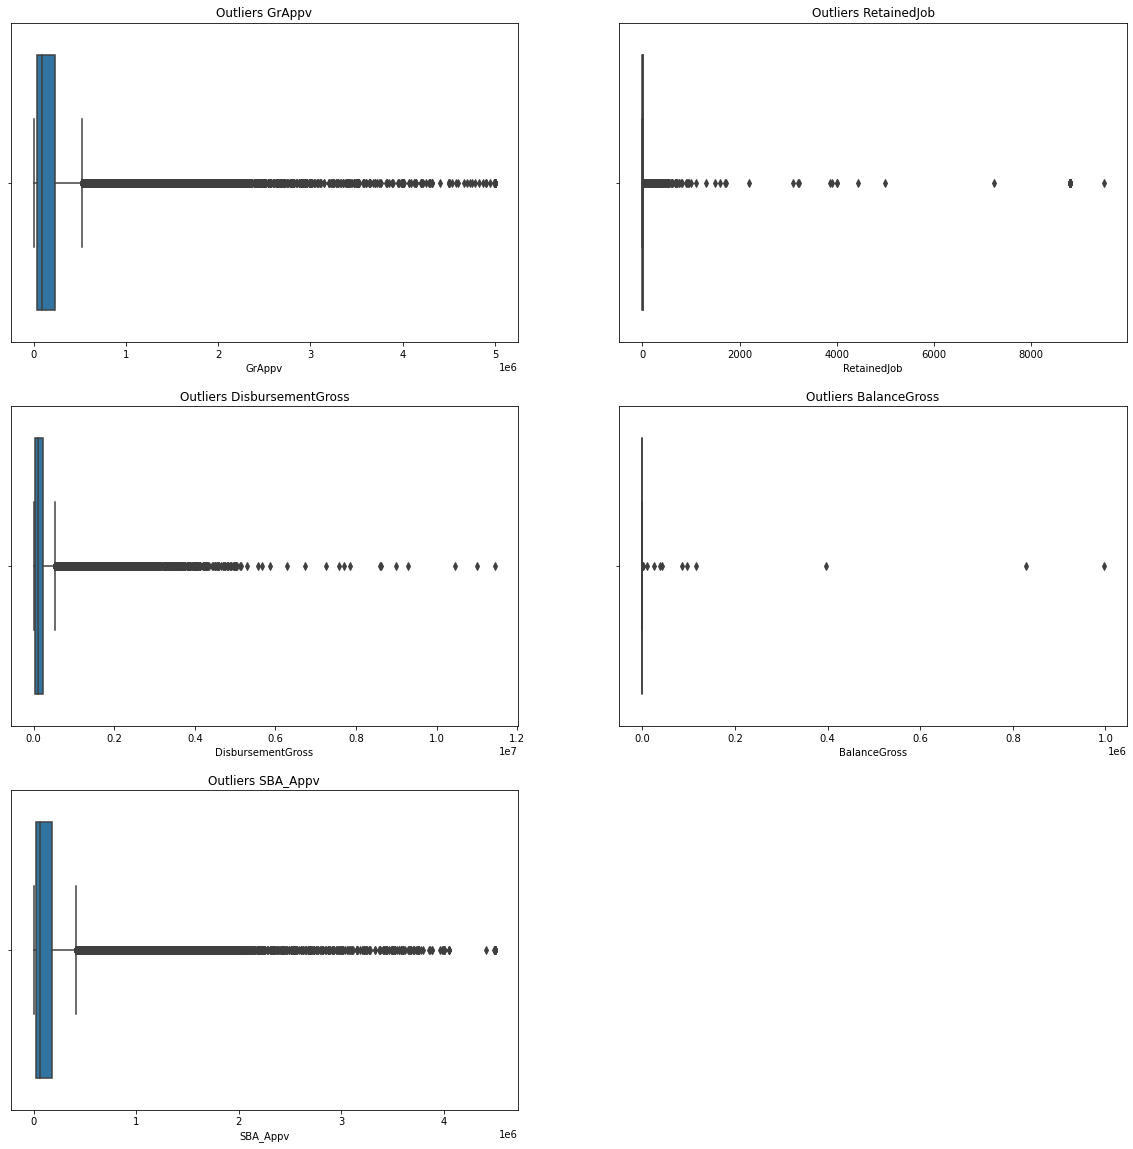

In [40]:
plt.figure(figsize=(20, 20))

plt.subplot(321)
sns.boxplot(x =df['GrAppv'])
plt.title('Outliers GrAppv')

plt.subplot(322)
sns.boxplot(x =df['RetainedJob'])
plt.title('Outliers RetainedJob')

plt.subplot(323)
sns.boxplot(x =df['DisbursementGross'])
plt.title('Outliers DisbursementGross');

plt.subplot(324)
sns.boxplot(x =df['BalanceGross'])
plt.title('Outliers BalanceGross');

plt.subplot(325)
sns.boxplot(x =df['SBA_Appv'])
plt.title('Outliers SBA_Appv');


Juga melihat data outlier menggunakan ploting boxplot.

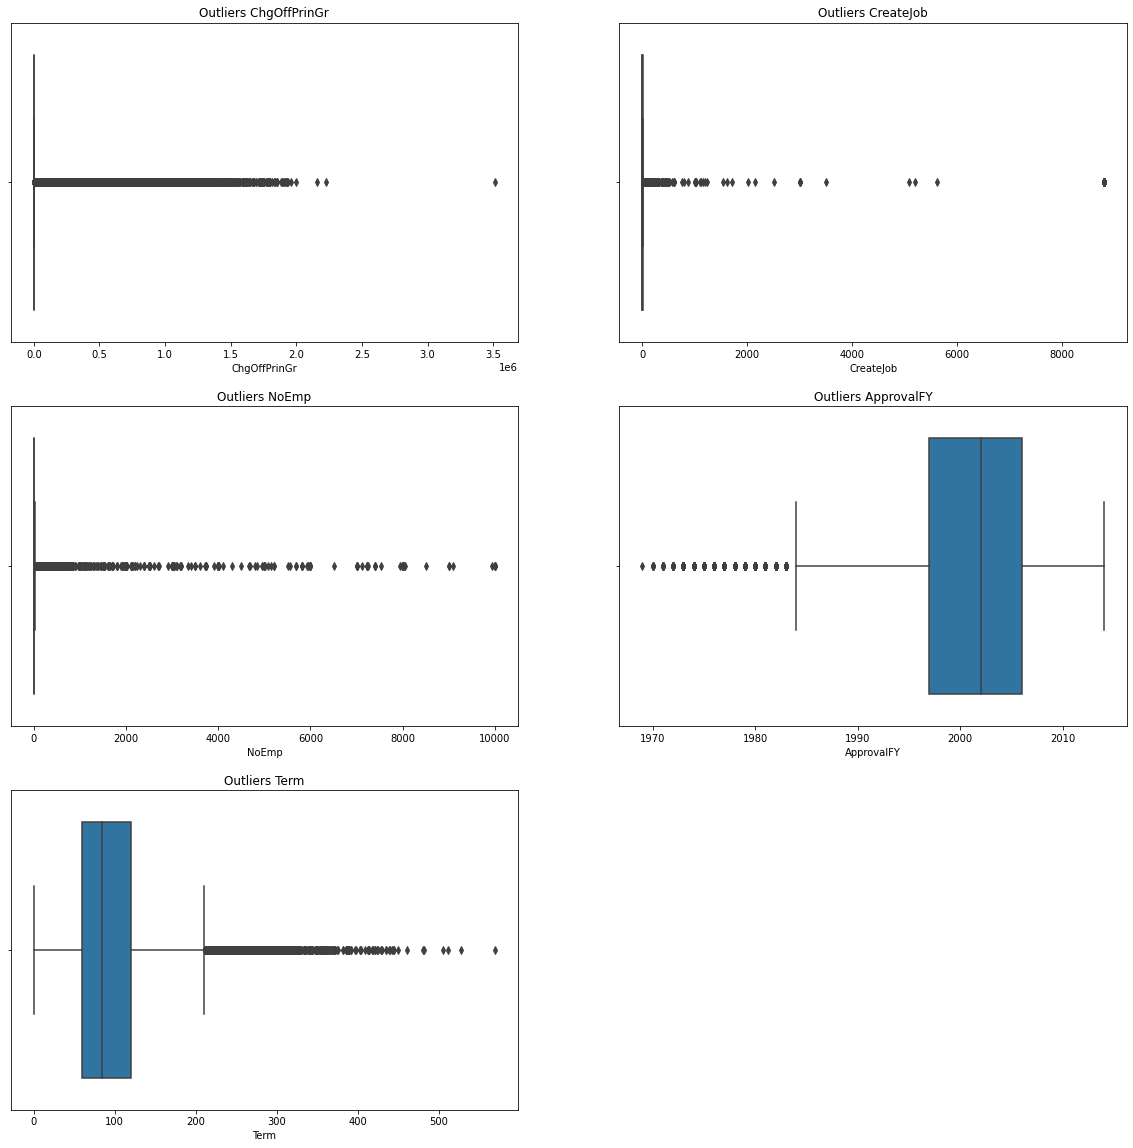

In [41]:
plt.figure(figsize=(20, 20))

plt.subplot(321)
sns.boxplot(x =df['ChgOffPrinGr'])
plt.title('Outliers ChgOffPrinGr');

plt.subplot(322)
sns.boxplot(x =df['CreateJob'])
plt.title('Outliers CreateJob');

plt.subplot(323)
sns.boxplot(x =df['NoEmp'])
plt.title('Outliers NoEmp');

plt.subplot(324)
sns.boxplot(x =df['ApprovalFY'])
plt.title('Outliers ApprovalFY');

plt.subplot(325)
sns.boxplot(x =df['Term'])
plt.title('Outliers Term');

In [42]:
def remove_outlier3(data, column):
    Q1 = np.percentile(data[column], 25,interpolation = 'midpoint')
    Q3 = np.percentile(data[column], 75,interpolation = 'midpoint')
    IQR = Q3 - Q1
    print("Old Shape: ", data[column].shape)
    lower = data[column]<=(Q1-1.5*IQR)
    upper = data[column]>= (Q3+1.5*IQR)
    data_final = data[(~upper) & (~lower)]
    print("New Shape: ", data_final.shape)
    return data_final

In [43]:
df=remove_outlier3(df, "GrAppv")
df.shape

Old Shape:  (866898,)
New Shape:  (784984, 34)


(784984, 34)

Kami memutuskan untuk menghapus outlier dari feature `GrAppv` karena jika dilihat dari boxplot memiliki jumlah outlier terbanyak. Value `GrAppv` yang memiliki outlier sebesar 81.914 baris data.

In [44]:
df['GrAppv'].describe()

count    784984.000000
mean     120859.770581
std      121008.698064
min        1000.000000
25%       30000.000000
50%       75000.000000
75%      165000.000000
max      522400.000000
Name: GrAppv, dtype: float64

Text(0.5, 1.0, 'Outliers GrAppv')

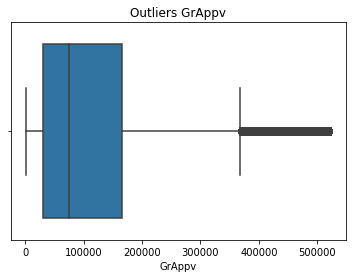

In [45]:
sns.boxplot(x =df['GrAppv'])
plt.title('Outliers GrAppv')

# 2.5 Feature Transformation

Melakukan transformation pada feature numeric

In [46]:
df[['GrAppv','RetainedJob','DisbursementGross','BalanceGross','SBA_Appv','NoEmp','ApprovalFY','ChgOffPrinGr','CreateJob','Term']].describe()

,GrAppv,RetainedJob,DisbursementGross,BalanceGross,SBA_Appv,NoEmp,ApprovalFY,ChgOffPrinGr,CreateJob,Term
count,784984.000000,784984.000000,7.849840e+05,784984.000000,784984.000000,784984.000000,784984.000000,7.849840e+05,784984.000000,784984.000000
mean,120859.770581,10.909343,1.305139e+05,0.368303,92463.937139,9.797940,2001.141591,1.018187e+04,8.707904,101.710483
std,121008.698064,249.460533,1.320411e+05,161.270191,101170.311489,73.414492,5.926751,3.643438e+04,249.224951,71.768321
min,1000.000000,0.000000,4.000000e+03,0.000000,500.000000,0.000000,1969.000000,0.000000e+00,0.000000,0.000000
25%,30000.000000,0.000000,3.950000e+04,0.000000,19500.000000,2.000000,1997.000000,0.000000e+00,0.000000,60.000000
50%,75000.000000,1.000000,8.625200e+04,0.000000,50000.000000,4.000000,2003.000000,0.000000e+00,0.000000,84.000000
75%,165000.000000,4.000000,1.787000e+05,0.000000,127500.000000,9.000000,2006.000000,0.000000e+00,1.000000,120.000000
max,522400.000000,9500.000000,4.029520e+06,96908.000000,522000.000000,9999.000000,2014.000000,1.121270e+06,8800.000000,569.000000


Lakukan normalisasi. 

In [47]:
df['Term'] = MinMaxScaler().fit_transform(df['Term'].values.reshape(len(df),1))
df['NoEmp'] = MinMaxScaler().fit_transform(df['NoEmp'].values.reshape(len(df),1))
df['ApprovalFY'] = MinMaxScaler().fit_transform(df['ApprovalFY'].values.reshape(len(df),1))
df['CreateJob'] = MinMaxScaler().fit_transform(df['CreateJob'].values.reshape(len(df),1))
df['RetainedJob'] = MinMaxScaler().fit_transform(df['RetainedJob'].values.reshape(len(df),1))
df['GrAppv'] = MinMaxScaler().fit_transform(df['GrAppv'].values.reshape(len(df),1))
df['DisbursementGross'] = MinMaxScaler().fit_transform(df['DisbursementGross'].values.reshape(len(df),1))
df['BalanceGross'] = MinMaxScaler().fit_transform(df['BalanceGross'].values.reshape(len(df),1))
df['SBA_Appv'] = MinMaxScaler().fit_transform(df['SBA_Appv'].values.reshape(len(df),1))
df['ChgOffPrinGr'] = MinMaxScaler().fit_transform(df['ChgOffPrinGr'].values.reshape(len(df),1))

In [48]:
df[['GrAppv','RetainedJob','DisbursementGross','BalanceGross','SBA_Appv','NoEmp','ApprovalFY','ChgOffPrinGr','CreateJob','Term']].describe()

,GrAppv,RetainedJob,DisbursementGross,BalanceGross,SBA_Appv,NoEmp,ApprovalFY,ChgOffPrinGr,CreateJob,Term
count,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000
mean,0.229881,0.001148,0.031428,0.000004,0.176345,0.000980,0.714258,0.009081,0.000990,0.178753
std,0.232084,0.026259,0.032801,0.001664,0.193999,0.007342,0.131706,0.032494,0.028321,0.126131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.055619,0.000000,0.008819,0.000000,0.036433,0.000200,0.622222,0.000000,0.000000,0.105448
50%,0.141926,0.000105,0.020433,0.000000,0.094919,0.000400,0.755556,0.000000,0.000000,0.147627
75%,0.314538,0.000421,0.043398,0.000000,0.243528,0.000900,0.822222,0.000000,0.000114,0.210896
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Normalisasi adalah teknik untuk mengubah value kolom numeric menjadi scale yang umum.


Kami memilih normalisasi karena karena scoring yang dihasilkan lebih bagus pada saat modeling.

# 2.6 Feature Encoding setelah feature selection

In [49]:
binary_encode = ['NewExists', 'FranchiseCode' 'RevLineCr', 'LowDoc', 'MIS_Status', 'is_franchise', 'Default'] 

Untuk feature  `NewExists, FranchiseCode, RevLineCr, LowDoc, MIS_Status, is_franchise, Default` sudah kami lakukan encoding secara manual, maka dari itu kami tampung ke dalam variable *binary_encode*.

In [50]:
ce_be_Name = ce.BinaryEncoder(cols=['Name'])
data_binary_Name = ce_be_Name.fit_transform(df["Name"])
print(df["Name"])
data_binary_Name

0                         ABC HOBBYCRAFT
1            LANDMARK BAR & GRILLE (THE)
2                  WHITLOCK DDS, TODD M.
3          BIG BUCKS PAWN & JEWELRY, LLC
4            ANASTASIA CONFECTIONS, INC.
                       ...              
899159                      FABRIC FARMS
899160                      FABRIC FARMS
899161      RADCO MANUFACTURING CO.,INC.
899162             MARUTAMA HAWAII, INC.
899163    PACIFIC TRADEWINDS FAN & LIGHT
Name: Name, Length: 784984, dtype: object


,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,Name_8,Name_9,Name_10,Name_11,Name_12,Name_13,Name_14,Name_15,Name_16,Name_17,Name_18,Name_19
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,1,0,1,0,0,1,1,1,1,1,1,0,1,1,0,1,1,0,0,1
899160,1,0,1,0,0,1,1,1,1,1,1,0,1,1,0,1,1,0,0,1
899161,1,0,1,0,0,1,1,1,1,1,1,0,1,1,0,1,1,0,1,0
899162,1,0,1,0,0,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1


In [51]:
ce_be_City = ce.BinaryEncoder(cols=['City'])
data_binary_City = ce_be_City.fit_transform(df["City"])
print(df["City"])
data_binary_City

0              EVANSVILLE
1               NEW PARIS
2             BLOOMINGTON
3            BROKEN ARROW
4                 ORLANDO
               ...       
899159    UPPER ARLINGTON
899160           COLUMBUS
899161        SANTA MARIA
899162           HONOLULU
899163             KAILUA
Name: City, Length: 784984, dtype: object


,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12,City_13,City_14
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,0,1,0,1,0,0,0,0,0,0,1,1,1,1,0
899160,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
899161,0,0,0,0,1,1,1,1,1,0,0,1,1,0,0
899162,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0


In [52]:
ce_be_State = ce.BinaryEncoder(cols=['State'])
data_binary_State = ce_be_State.fit_transform(df["State"])
print(df["State"])
data_binary_State

0         IN
1         IN
2         IN
3         OK
4         FL
          ..
899159    OH
899160    OH
899161    CA
899162    HI
899163    HI
Name: State, Length: 784984, dtype: object


,State_0,State_1,State_2,State_3,State_4,State_5
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,1,0
4,0,0,0,0,1,1
...,...,...,...,...,...,...
899159,0,1,0,0,1,1
899160,0,1,0,0,1,1
899161,0,0,1,1,1,1
899162,1,1,0,0,0,1


In [53]:
ce_be_Zip = ce.BinaryEncoder(cols=['Zip'])
data_binary_Zip = ce_be_Zip.fit_transform(df["Zip"])
print(df["Zip"])
data_binary_Zip

0         47711
1         46526
2         47401
3         74012
4         32801
          ...  
899159    43221
899160    43221
899161    93455
899162    96830
899163    96734
Name: Zip, Length: 784984, dtype: int64


,Zip_0,Zip_1,Zip_2,Zip_3,Zip_4,Zip_5,Zip_6,Zip_7,Zip_8,Zip_9,Zip_10,Zip_11,Zip_12,Zip_13,Zip_14
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,0,0,0,1,0,0,1,0,0,1,1,0,1,1,0
899160,0,0,0,1,0,0,1,0,0,1,1,0,1,1,0
899161,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1
899162,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0


In [54]:
ce_be_Bank = ce.BinaryEncoder(cols=['Bank'])
data_binary_Bank = ce_be_Bank.fit_transform(df["Bank"])
print(df["Bank"])
data_binary_Bank

0                       FIFTH THIRD BANK
1                        1ST SOURCE BANK
2                GRANT COUNTY STATE BANK
3          1ST NATL BK & TR CO OF BROKEN
4                FLORIDA BUS. DEVEL CORP
                       ...              
899159    JPMORGAN CHASE BANK NATL ASSOC
899160    JPMORGAN CHASE BANK NATL ASSOC
899161    RABOBANK, NATIONAL ASSOCIATION
899162                    BANK OF HAWAII
899163              CENTRAL PACIFIC BANK
Name: Bank, Length: 784984, dtype: object


,Bank_0,Bank_1,Bank_2,Bank_3,Bank_4,Bank_5,Bank_6,Bank_7,Bank_8,Bank_9,Bank_10,Bank_11,Bank_12
0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,0,0,0,0,0,0,0,1,0,0,0,0,0
899160,0,0,0,0,0,0,0,1,0,0,0,0,0
899161,0,0,0,0,0,0,0,1,1,1,0,0,0
899162,0,0,0,0,0,1,1,1,0,0,0,0,1


In [55]:
ce_be_BankState = ce.BinaryEncoder(cols=['BankState'])
data_binary_BankState = ce_be_BankState.fit_transform(df["BankState"])
print(df["BankState"])
data_binary_BankState

0         OH
1         IN
2         IN
3         OK
4         FL
          ..
899159    IL
899160    IL
899161    CA
899162    HI
899163    HI
Name: BankState, Length: 784984, dtype: object


,BankState_0,BankState_1,BankState_2,BankState_3,BankState_4,BankState_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,1
4,0,0,0,1,0,0
...,...,...,...,...,...,...
899159,0,1,1,0,0,1
899160,0,1,1,0,0,1
899161,0,1,1,0,0,0
899162,1,1,0,0,1,0


In [56]:
ce_be_Industry = ce.BinaryEncoder(cols=['Industry'])
data_binary_Industry = ce_be_Industry.fit_transform(df["Industry"])
print(df["Industry"])
data_binary_Industry

0                     Retail_trade
1                  Accom/Food_serv
2         Healthcare/Social_assist
3                              NaN
4                              NaN
                    ...           
899159                Retail_trade
899160                Retail_trade
899161               Manufacturing
899162                         NaN
899163                         NaN
Name: Industry, Length: 784984, dtype: object


,Industry_0,Industry_1,Industry_2,Industry_3,Industry_4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,1
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
899159,0,0,0,0,1
899160,0,0,0,0,1
899161,0,0,1,0,1
899162,0,0,1,0,0


Kami putuskan untuk melakukan category encoders pada feature yang memiliki kardinalitas yang tinggi, yaitu pada feature `Name, City, State, Zip, Bank, BankState, Industry `, yang mana pada saat diencoding akan terbentuk kolom baru yang mewakilkan tiap category. 

Kami tidak melakukan 

In [57]:
label_encoder = LabelEncoder()
df['Name'] = label_encoder.fit_transform(df['Name'])
df['City'] = label_encoder.fit_transform(df['City'])
df['State'] = label_encoder.fit_transform(df['State'])
df['Zip'] = label_encoder.fit_transform(df['Zip'])
df['Bank'] = label_encoder.fit_transform(df['Bank'])
df['BankState'] = label_encoder.fit_transform(df['BankState'])
df['Industry'] = label_encoder.fit_transform(df['Industry'])
df['MIS_Status'] = label_encoder.fit_transform(df['MIS_Status'])

Menggunakan ANOVA untuk melihat hubungan antar fitur dengan target.

In [58]:
anova_name = ols('Name ~ MIS_Status', data=df).fit()
anova_city = ols('City ~ MIS_Status', data=df).fit()
anova_state = ols('State ~ MIS_Status', data=df).fit()
anova_zip = ols('Zip ~ MIS_Status', data=df).fit()
anova_bank = ols('Bank ~ MIS_Status', data=df).fit()
anova_bs = ols('BankState ~ MIS_Status', data=df).fit()
anova_industry = ols('Industry ~ MIS_Status', data=df).fit()

In [59]:
residual1=anova_name.resid
residual2=anova_city.resid
residual3=anova_state.resid
residual4=anova_zip.resid
residual5=anova_bank.resid
residual6=anova_bs.resid
residual7=anova_industry.resid

In [60]:
stats.shapiro(residual1)
stats.shapiro(residual2)
stats.shapiro(residual3)
stats.shapiro(residual4)
stats.shapiro(residual5)
stats.shapiro(residual6)
stats.shapiro(residual7)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9067314267158508, pvalue=0.0)

Text(0.5, 1.0, "Probability plot of Industry ~ MIS_Status residual's")

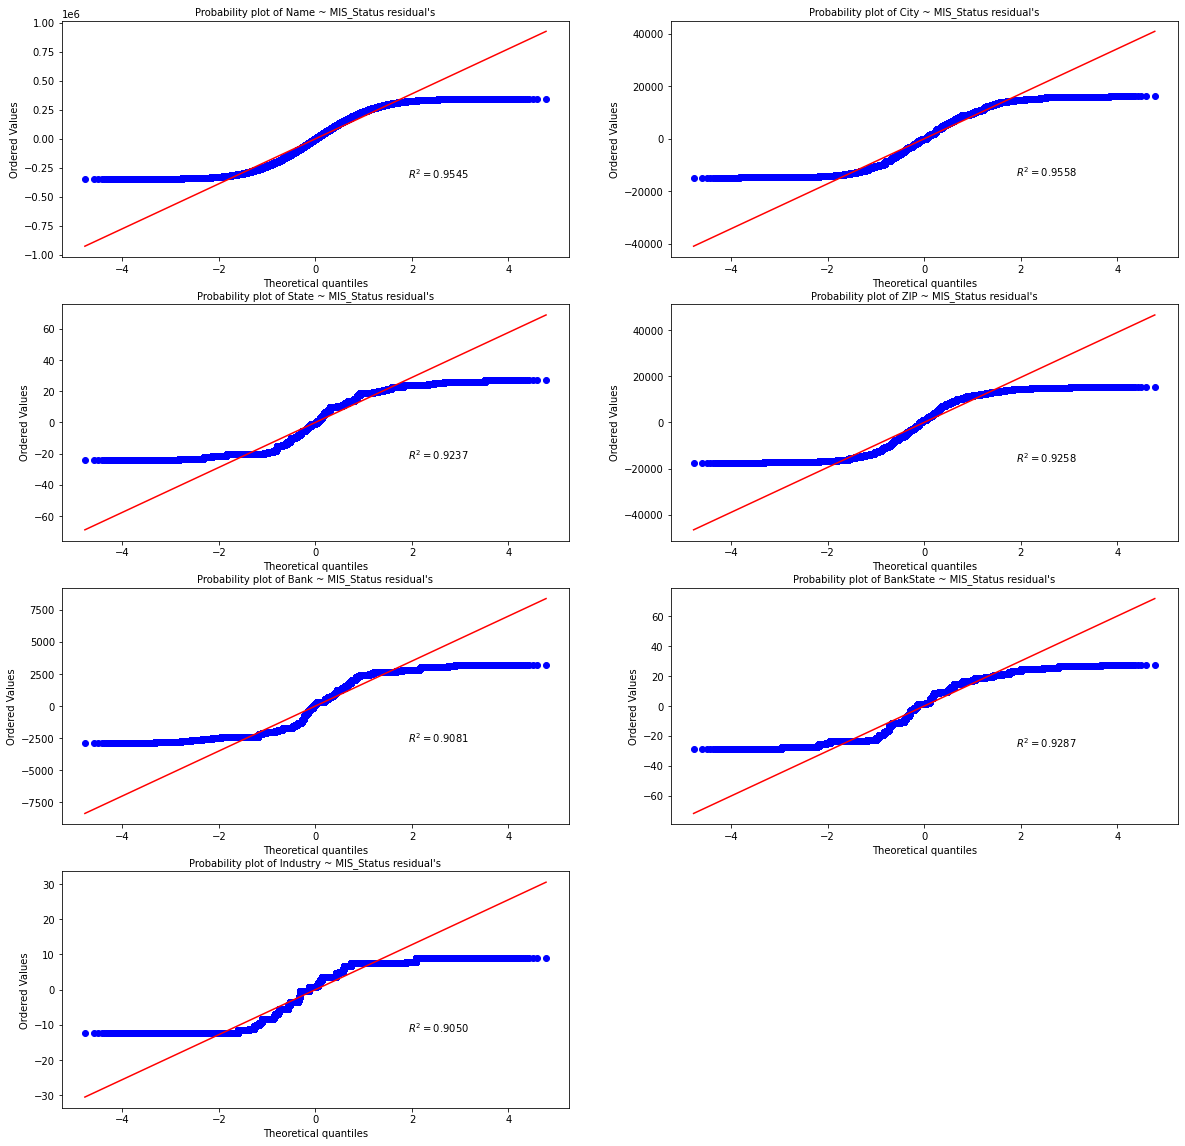

In [61]:
fig = plt.figure(figsize= (20, 20))


plt.subplot(421)
normality_plot, stat = stats.probplot(residual1, plot= plt, rvalue= True)
plt.title("Probability plot of Name ~ MIS_Status residual's", fontsize= 10)

plt.subplot(422)
normality_plot, stat = stats.probplot(residual2, plot= plt, rvalue= True)
plt.title("Probability plot of City ~ MIS_Status residual's", fontsize= 10)

plt.subplot(423)
normality_plot, stat = stats.probplot(residual3, plot= plt, rvalue= True)
plt.title("Probability plot of State ~ MIS_Status residual's", fontsize= 10)


plt.subplot(424)
normality_plot, stat = stats.probplot(residual4, plot= plt, rvalue= True)
plt.title("Probability plot of ZIP ~ MIS_Status residual's", fontsize= 10)


plt.subplot(425)
normality_plot, stat = stats.probplot(residual5, plot= plt, rvalue= True)
plt.title("Probability plot of Bank ~ MIS_Status residual's", fontsize= 10)


plt.subplot(426)
normality_plot, stat = stats.probplot(residual6, plot= plt, rvalue= True)
plt.title("Probability plot of BankState ~ MIS_Status residual's", fontsize= 10)


plt.subplot(427)
normality_plot, stat = stats.probplot(residual7, plot= plt, rvalue= True)
plt.title("Probability plot of Industry ~ MIS_Status residual's", fontsize= 10)

In [62]:
import pingouin as pg
print ("Name:")
print(pg.homoscedasticity(df, dv='Name', group='MIS_Status'))
print ("")


print ("City:")
print(pg.homoscedasticity(df, dv='City', group='MIS_Status'))
print ("")

print ("State:")
print(pg.homoscedasticity(df, dv='State', group='MIS_Status'))
print ("")

print ("Zip:")
print(pg.homoscedasticity(df, dv='Zip', group='MIS_Status'))
print ("")

print ("Bank:")
print(pg.homoscedasticity(df, dv='Bank', group='MIS_Status'))
print ("")

print ("BankState:")
print(pg.homoscedasticity(df, dv='BankState', group='MIS_Status'))
print ("")

print ("Industry:")
print(pg.homoscedasticity(df, dv='Industry', group='MIS_Status'))
print ("")

Name:
               W      pval  equal_var
levene  5.312281  0.021176      False

City:
                 W          pval  equal_var
levene  205.060671  1.665018e-46      False

State:
                 W          pval  equal_var
levene  149.348319  2.423983e-34      False

Zip:
               W      pval  equal_var
levene  0.238217  0.625497       True

Bank:
                 W           pval  equal_var
levene  454.728382  7.208008e-101      False

BankState:
                 W           pval  equal_var
levene  766.391323  1.320647e-168      False

Industry:
                W          pval  equal_var
levene  96.916752  7.252538e-23      False



In [63]:
coba2 = ols('MIS_Status~ Name+City+State+Zip+Bank+BankState+Industry', data=df).fit()

tabel_anova = sm.stats.anova_lm(coba2, typ=2)
print(tabel_anova)

                  sum_sq        df            F         PR(>F)
Name            0.255169       1.0     1.746601   1.863050e-01
City            8.282285       1.0    56.691337   5.104172e-14
State         115.805665       1.0   792.677143  2.577863e-174
Zip             3.206910       1.0    21.950948   2.797554e-06
Bank          648.957456       1.0  4442.042974   0.000000e+00
BankState       0.866367       1.0     5.930190   1.488386e-02
Industry      642.479008       1.0  4397.698707   0.000000e+00
Residual   114680.571660  784976.0          NaN            NaN


Kesimpulan:

* Feature `Name` dan `BankState` tidak berkorelasi dengan Feature Target `MIS_Status` karena memiliki nilai Pr>F  yang lebih besar (>) dari 0.05.
* Feature `City`, `State`, `Bank`,`Zip` dan `Industry`  berkorelasi dengan Feature Target `MIS_Status` karena memiliki nilai Pr>F  yang lebih kecil (<) dari 0.05.

# 2.6 Class Imbalance

Untuk modelling nanti kami akan gunakan 3 model dan akan kami bandingkan:

*   XGBoost
*   RandomForest
*   Decision Tree



# 2.7 Feature Engineering

## 2.7.1 Feature Selection 

Feature Nums dengan target Kategorik : ANOVA feature selection. **Perhitungan menggunakan metode lain, ANOVA, sudah kami gunakan pada fitur encoding**

In [64]:
nums=['ApprovalFY','Term', 'NoEmp', 'CreateJob', 'RetainedJob','FranchiseCode','DisbursementGross', 'BalanceGross', 'ChgOffPrinGr','GrAppv','SBA_Appv']

In [65]:
df[nums].corr()

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
ApprovalFY,1.000000,-0.331877,-0.051260,-0.070824,-0.064949,-0.016811,-0.162332,0.002734,0.067337,-0.254635,-0.313830
Term,-0.331877,1.000000,0.033834,0.033029,0.030300,0.002941,0.434134,-0.000749,-0.122062,0.528754,0.575749
NoEmp,-0.051260,0.033834,1.000000,0.008003,0.011638,0.007949,0.068336,-0.000027,0.000832,0.074081,0.076479
CreateJob,-0.070824,0.033029,0.008003,1.000000,0.995730,0.000490,0.018744,-0.000038,0.014733,0.023330,0.033144
RetainedJob,-0.064949,0.030300,0.011638,0.995730,1.000000,-0.000657,0.020376,-0.000037,0.014878,0.023191,0.031590
FranchiseCode,-0.016811,0.002941,0.007949,0.000490,-0.000657,1.000000,0.042419,0.002085,0.038548,0.062825,0.064924
DisbursementGross,-0.162332,0.434134,0.068336,0.018744,0.020376,0.042419,1.000000,-0.000211,0.154184,0.907317,0.860187
BalanceGross,0.002734,-0.000749,-0.000027,-0.000038,-0.000037,0.002085,-0.000211,1.000000,-0.000638,-0.000147,-0.000802
ChgOffPrinGr,0.067337,-0.122062,0.000832,0.014733,0.014878,0.038548,0.154184,-0.000638,1.000000,0.153116,0.122067
GrAppv,-0.254635,0.528754,0.074081,0.023330,0.023191,0.062825,0.907317,-0.000147,0.153116,1.000000,0.976395


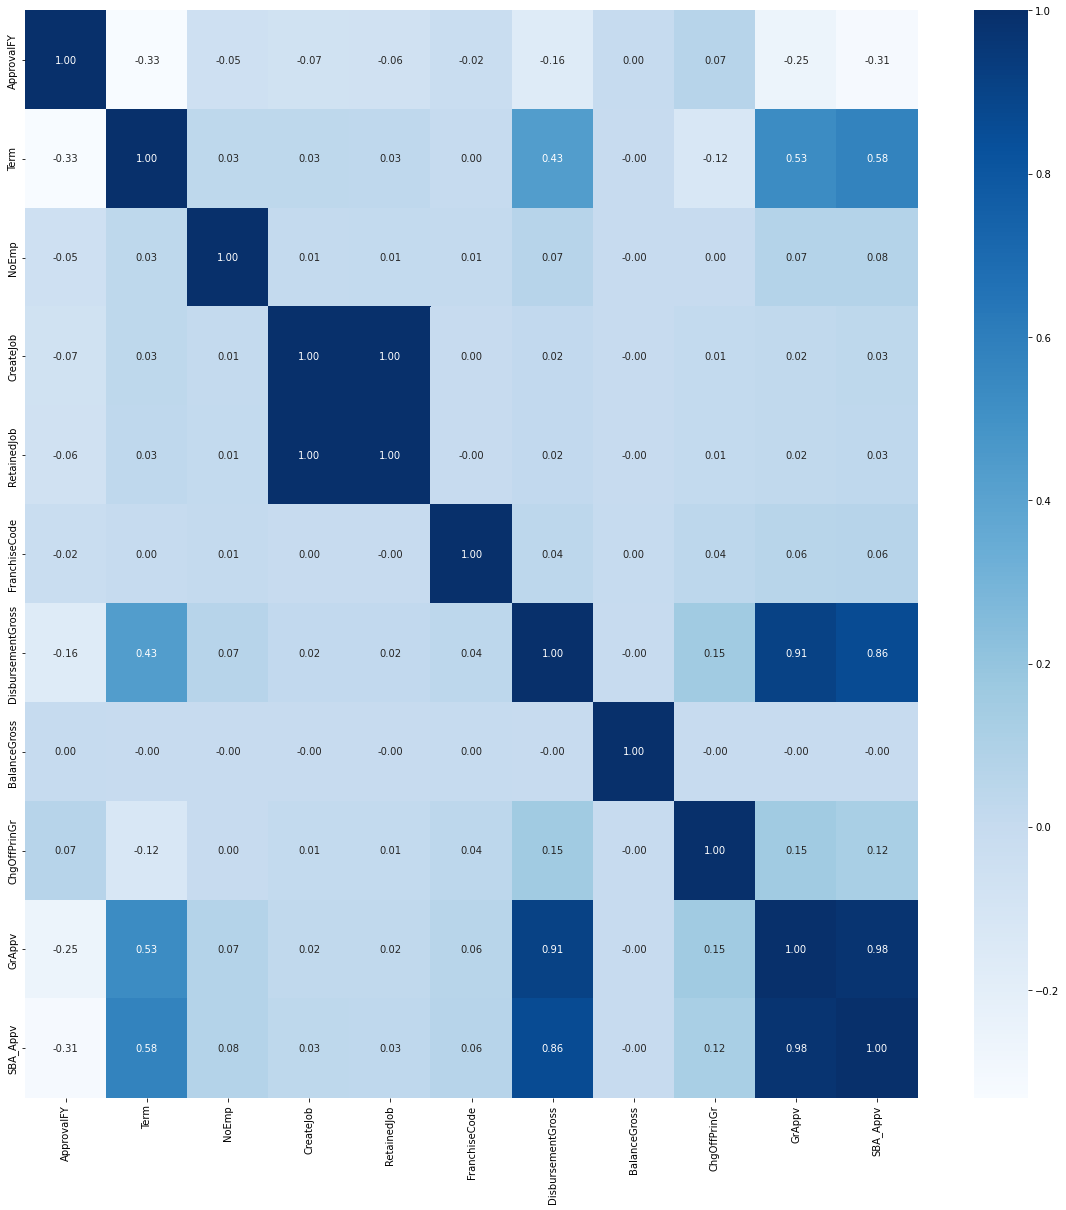

In [66]:
plt.figure(figsize=(20, 20))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

In [67]:
df_nums_drop = df[nums].drop(columns=['RetainedJob', 'GrAppv', 'CreateJob'])

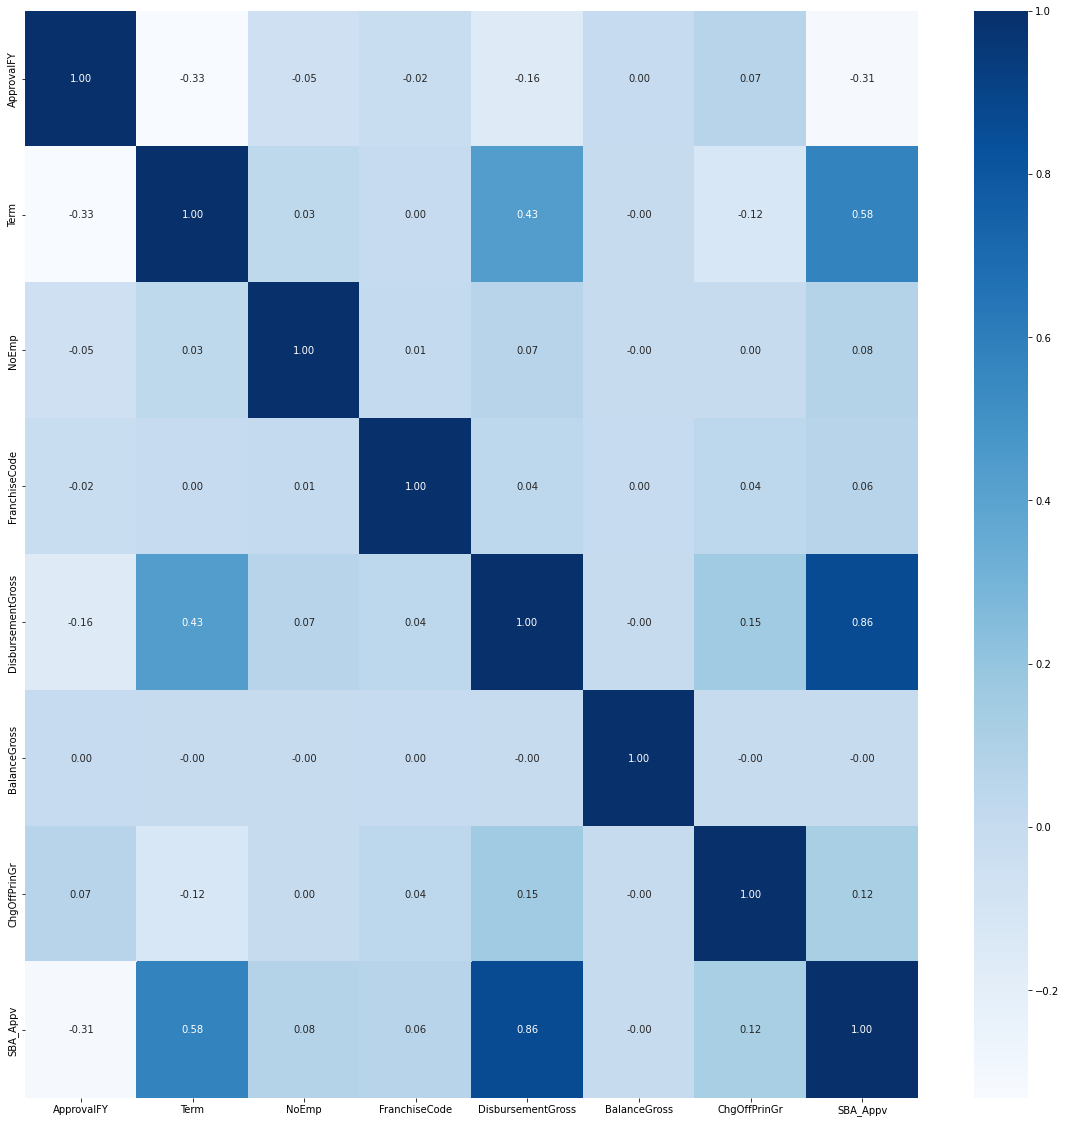

In [68]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_nums_drop.corr(), cmap='Blues', annot=True, fmt='.2f')

In [69]:
nums_test=['ApprovalFY','Term', 'NoEmp', 'CreateJob', 'FranchiseCode','DisbursementGross', 'BalanceGross', 'ChgOffPrinGr','SBA_Appv']

In [70]:
# compute the vif for all given features
def compute_vif(nums_test):
    
    X = df[nums_test]
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    
    return vif

compute_vif(nums_test)


,Variable,VIF
0,ApprovalFY,2.916913
1,Term,4.437540
2,NoEmp,1.023331
3,CreateJob,1.003704
4,FranchiseCode,1.051357
5,DisbursementGross,7.776634
6,BalanceGross,1.000014
7,ChgOffPrinGr,1.169538
8,SBA_Appv,9.117098


Untuk pasangan variabel numerik yang berkorelasi tinggi dapat dipilih dengan metode VIF. Variabel `ApprovalFY`,`Term`, `NoEmp`, `CreateJob`, `FranchiseCode`,`DisbursementGross`, `BalanceGross`, `ChgOffPrinGr`, dan `SBA_Appv` dapat digunakan untuk memprediksi target.

Nilai VIF yang kecil (<10) mengindikasikan variabel tersebut memiliki multikolinearitas yang rendah dengan variabel lainnya.

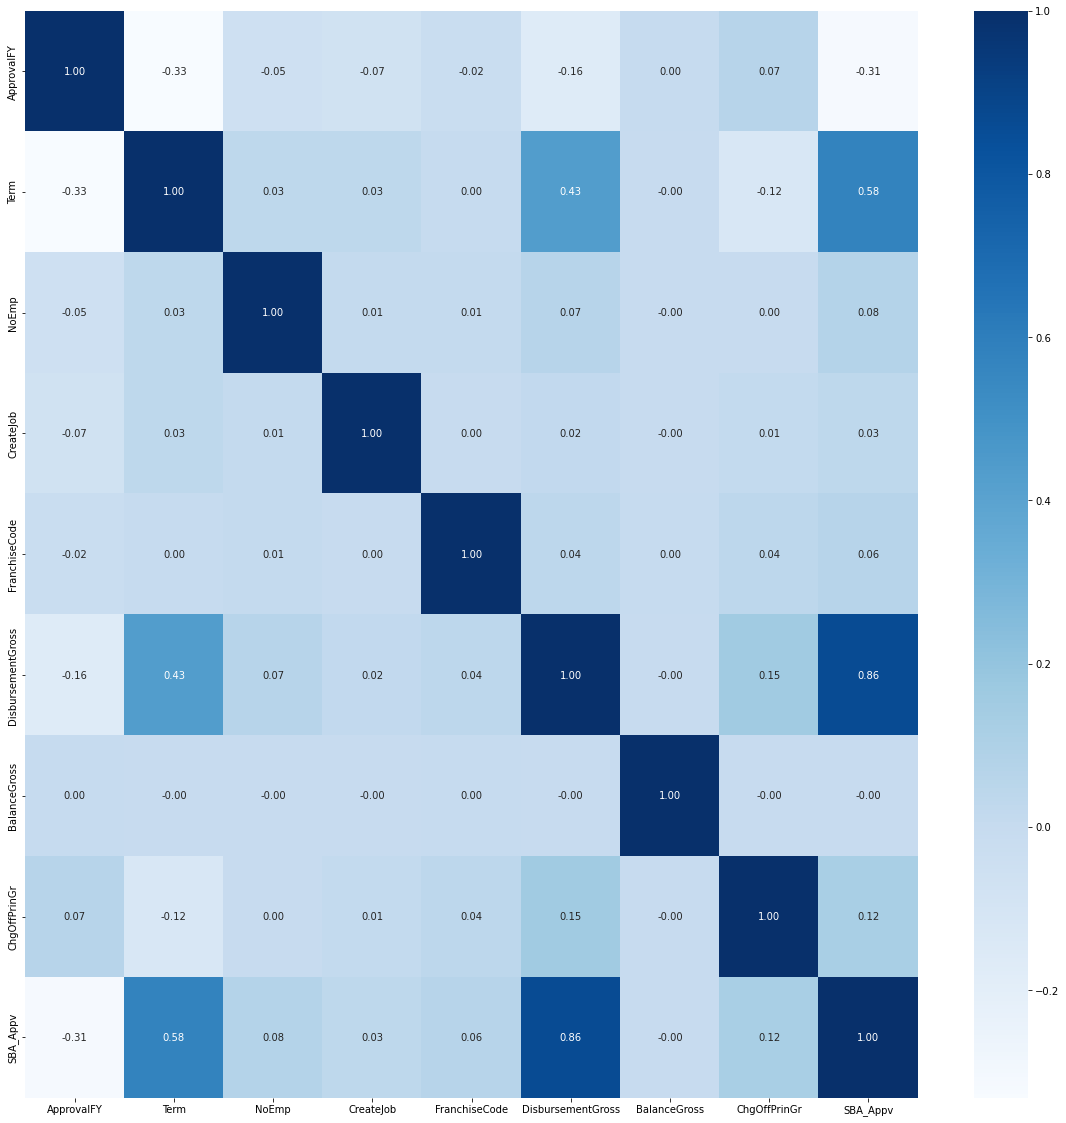

In [71]:
plt.figure(figsize=(20, 20))
sns.heatmap(df[nums_test].corr(), cmap='Blues', annot=True, fmt='.2f')

## 2.7.2 Feature Extraction (Membuat Feature baru dari Feature yang sudah ada)

Membuat feature `SBA_AppvPct` untuk mengetahui berapa besar jumlah pinjaman yang dicover oleh SBA dalam persen (%)

In [72]:
df['SBA_AppvPct'] = df['SBA_Appv'] / df['GrAppv']

Membuat feature '`GreatRecession`' untuk melihat apakah pinjaman ini aktif saat periode resesi atau tidak

Membuat kolom baru `DisbursementFY` yang menunjukkan tahun pinjaman cair.

In [73]:
df['DisbursementFY'] = df['DisbursementDate'].map(lambda x: x.year)

In [74]:
df['GreatRecession'] = np.where(((2007 <= df['DisbursementFY']) & (df['DisbursementFY'] <= 2009)), 1, 0)

Mengekstrak feature `Term` menjadi feature `RealEstate`. Feature ini menggambarkan pinjaman yang dijaminkan `RealEstate` pada umumnya memiliki periode >240 bulan

In [75]:
df['RealEstate'] = np.where(df['Term'] >= 240, 1, 0)

Mengambil tahun pinjaman dicairkan dalam feature `DisbursementFY`

In [76]:
df['DisbursementFY'] = df['DisbursementDate'].map(lambda x: x.year)

# 2.8 Feature Tambahan

 Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) yang mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya dan tidak perlu diimplementasikan)



*   Feature **Interest Rate**

Biasanya di Indonesia, hal seperti ini dikenal dengan Kredit Modal Kerja (KMK). Layanan ini disediakan oleh beberapa bank dengan sistem memberikan sejumlah pinjaman kepada para pengusaha kecil untuk mendukung usaha mereka. Lazimnya, bank dan instansi terkait akan mengenakan bunga bagi para peminjam. Rata-rata bank di Indonesia mengenakan bunga sebesar 10-15% per tahunnya tergantung jenis KMK. Menurut kami, hal ini bisa dijadikan feature untuk memperkaya dataset ini. 

Dengan adanya feature 'bunga', kita dapat mengukur seberapa besar keuntungan bunga yang didapatkan oleh bank dan instansi terkait (dalam hal ini perusahaan asuransi SBA) untuk memberikan pinjaman kepada calon peminjam. Jika tenor lebih lama dan jumlah pinjaman lebih besar, bunga yang dikenakan cenderung lebih besar. Jika dimasukkan ke rumus untuk memperoleh perhitungan jumlah bunga bisa didapatkan dari:

Jumlah awal pinjaman x suku bunga per tahun x jumlah tahun jangka waktu kredit/jumlah bulan dalam jangka waktu kredit.

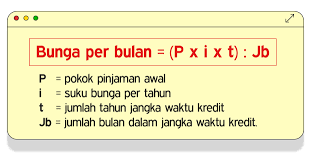

Sumber: https://www.ojk.go.id/id/kanal/perbankan/Pages/Suku-Bunga-dasar.aspx

*   Feature **Financing Needs atau Kebutuhan Pembiayaan**, bisa memiliki beberapa value yang disesuaikan dengan kebutuhannya seperti:
1. Time loan revolving (customer yang membutuhkan modal usaha berupa pembiayaan liquid (non musiman) atau musiman (berkala). Contohnya: Pabrik tekstil, kontraktor
2. Time loan insidentil (customer yang membutuhkan modal usaha berupa pembiayaan musiman (hanya 1x pinjaman). Contohnya: Distributor seragam sekolah, Distributor baju muslim
3. Installment loan (customer mengajukan pinjaman dan menggunakan keuntungan dari usahanya secara perlahan-lahan untuk membayar pinjaman tersebut sehingga pinjaman telah lunas dalam waktu 2 tahun misalnya)
Feature ini dinilai cukup penting bagi bank untuk mengetahui latar belakang dari pinjaman modal yang diajukan oleh calon pemodal. Bank juga bisa menimbang apakah pinjaman layak diberikan berdasarkan kondisi calon peminjam saat ini (bisa meminimalkan risiko).


*   Feature **Fees**
Feature ini berisi value yang menandakan fee yang harus dibayarkan oleh calon peminjam bisnis kecil setelah mengajukan pinjaman. Nantinya, hal ini bisa menjadi pertimbangan bagi SBA dan Bank dalam menerima loan karena bisa memberikan keuntungan bagi kita. Perhitungan fee sendiri biasanya didasarkan dari jumlah loan yang diajukan dan latar belakang dari bisnis tersebut.

*   Feature **Jumlah Pinalti**
Setelah peminjam dinyatakan default, akan lebih baik jika ditambahkan feature baru yang berisi jumlah pinalti yang harus dibayar oleh peminjam. Hal ini tentunya bisa menantu pihak bank dan SBA untuk melakukan pemantauan terhadap data yang ada. Jumlah pinalti ini bisa didasarkan dari kebijakan masing-masing, untuk pinjaman yang memiliki jaminan Real Estate, maka jaminan tersebut akan menjadi milik bank atau SBA itu sendiri.




#**STAGE 3**

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from joblib import Parallel, delayed

import joblib
import pickle, os

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

# 3.1 Split Data Test & Train

## 3.1.1 Stratified Random Sampling for Machine Learning


Karena data aslinya terlalu besar (ada 784984 baris), untuk menghemat waktu komputasi juga kita putuskan untuk melakukan sampling dengan n_sample sebanyak 10000 baris untuk final project ini agar komputasinya tidak terlalu berat. Kita melakukan sampling dengan metode Stratified Random Sampling agar proporsi strata yang ada di data populasi tetap sama proporsinya dengan data sample yang akan kita ambil. Strata yang digunakan adalah jenis industrinya (Retail trade, beverage, dan lain-lain).

Rumus perhitungannya kita dapatkan dari sumber berikut: https://youtu.be/ZDDybDAJMSw

In [78]:
df['Industry'] = df['NAICS'].astype('str').apply(lambda x: x[:2])

In [79]:
df['Industry'] = df['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})
df['Industry'].value_counts()

Retail_trade                113390
Other_no_pub                 65379
Prof/Science/Tech            61114
Construction                 60383
Accom/Food_serv              56814
Manufacturing                55310
Healthcare/Social_assist     48273
Wholesale_trade              40573
Admin_sup/Waste_Mgmt_Rem     29840
Trans/Ware                   20337
Arts/Entertain/Rec           12377
RE/Rental/Lease              12033
Information                  10151
Finance/Insurance             8538
Ag/For/Fish/Hunt              7544
Educational                   5749
Min/Quar/Oil_Gas_ext          1548
Utilities                      595
Public_Admin                   214
Mgmt_comp                      210
Name: Industry, dtype: int64

Kami memutuskan mengambil sampel sebanyak 400000 data yang kisarannya hampir 50% dari total data, sehingga masih bisa merepresentasikan model yang nanti akan dibuat

In [80]:
df_manu_proportion = pd.DataFrame(df['Industry'].value_counts()).reset_index()
df_manu_proportion = df_manu_proportion.rename(columns={'index':'Industry', 'Industry':'count_before'})
df_manu_proportion['percentage_before'] = [i/df['Industry'].count() for i in df_manu_proportion['count_before']]
df_manu_proportion['count_after'] = [round((i/df['Industry'].count())*10000)  for i in df_manu_proportion['count_before']]
df_manu_proportion['percentage_after'] = [i/10000 for i in df_manu_proportion['count_after']]
df_manu_proportion 

,Industry,count_before,percentage_before,count_after,percentage_after
0,Retail_trade,113390,0.185772,1858,0.1858
1,Other_no_pub,65379,0.107113,1071,0.1071
2,Prof/Science/Tech,61114,0.100126,1001,0.1001
3,Construction,60383,0.098928,989,0.0989
4,Accom/Food_serv,56814,0.093081,931,0.0931
5,Manufacturing,55310,0.090617,906,0.0906
6,Healthcare/Social_assist,48273,0.079088,791,0.0791
7,Wholesale_trade,40573,0.066473,665,0.0665
8,Admin_sup/Waste_Mgmt_Rem,29840,0.048888,489,0.0489
9,Trans/Ware,20337,0.033319,333,0.0333


*   Bisa dilihat di atas, proporsi strata before sampling dan after sampling, terlihat proporsinya identik.



Ini adalah dataframe hasil Stratified Random Sampling

In [81]:
Retail_trade = df[df['Industry'] == 'Retail_trade'].sample(n=1858, random_state=42)
Other_no_pub = df[df['Industry'] == 'Other_no_pub'].sample(n=1071, random_state=42)
Prof_Science_Tech	 = df[df['Industry'] == 'Prof/Science/Tech'].sample(n=1001, random_state=42)
Construction = df[df['Industry'] == 'Construction'].sample(n=989, random_state=42)
Accom_Food_serv	 = df[df['Industry'] == 'Accom/Food_serv'].sample(n=931, random_state=42)
Manufacturing = df[df['Industry'] == 'Manufacturing'].sample(n=906, random_state=42)
Healthcare_Social_assist = df[df['Industry'] == 'Healthcare/Social_assist'].sample(n=791, random_state=42)
Wholesale_trade = df[df['Industry'] == 'Wholesale_trade'].sample(n=665, random_state=42)
Admin_sup_Waste_Mgmt_Rem = df[df['Industry'] == 'Admin_sup/Waste_Mgmt_Rem'].sample(n=489, random_state=42)
Trans_Ware = df[df['Industry'] == 'Trans/Ware'].sample(n=333, random_state=42)
Arts_Entertain_Rec = df[df['Industry'] == 'Arts/Entertain/Rec'].sample(n=203, random_state=42)
RE_Rental_Lease	 = df[df['Industry'] == 'RE/Rental/Lease'].sample(n=197, random_state=42)
Information = df[df['Industry'] == 'Information'].sample(n=166, random_state=42)
Finance_Insurance	 = df[df['Industry'] == 'Finance/Insurance'].sample(n=140, random_state=42)
Ag_For_Fish_Hunt = df[df['Industry'] == 'Ag/For/Fish/Hunt'].sample(n=124, random_state=42)
Educational = df[df['Industry'] == 'Educational'].sample(n=94, random_state=42)
Min_Quar_Oil_Gas_ext	 = df[df['Industry'] == 'Min/Quar/Oil_Gas_ext'].sample(n=25, random_state=42)
Utilities	 = df[df['Industry'] == 'Utilities'].sample(n=10, random_state=42)
Public_Admin	 = df[df['Industry'] == 'Public_Admin'].sample(n=10, random_state=42)
Mgmt_comp	 = df[df['Industry'] == 'Mgmt_comp'].sample(n=10, random_state=42)

df_strat = pd.concat([Healthcare_Social_assist, Retail_trade, Other_no_pub, Prof_Science_Tech, Construction, Accom_Food_serv, Manufacturing, Wholesale_trade, Admin_sup_Waste_Mgmt_Rem, Trans_Ware, Arts_Entertain_Rec, RE_Rental_Lease, Information, Finance_Insurance, Ag_For_Fish_Hunt, Educational,Min_Quar_Oil_Gas_ext
])
df_strat.reset_index(drop=True, inplace=True)
df_strat

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,ApprovalYear,ApprovalMonth,ApprovalDay,DisbursementYear,DisbursementMonth,DisbursementDay,Default,IsFranchise,Industry,SBA_AppvPct,DisbursementFY,GreatRecession,RealEstate
0,3054365004,14392,7816,14,20022,3158,17,623110,2008-04-18,0.866667,0.054482,0.0004,1.0,0.000227,0.000421,0,0,0,2009-06-30,0.011601,0.0,0,0.042427,0.095320,0.047651,2008,4,18,2009,6,30,1,0.0,Healthcare/Social_assist,0.499904,2009,1,0
1,2678335010,593068,15448,43,26392,900,11,621512,2007-09-04,0.844444,0.193322,0.0002,1.0,0.000000,0.000211,0,0,0,2007-09-30,0.008943,0.0,1,0.034455,0.074799,0.064238,2007,9,4,2007,9,30,0,0.0,Healthcare/Social_assist,0.858810,2007,1,0
2,4053635005,350886,23775,4,29455,3158,17,621210,2010-04-29,0.911111,0.147627,0.0010,0.0,0.000000,0.001053,0,0,0,2010-05-01,0.050751,0.0,1,0.000000,0.397583,0.198754,2010,4,29,2010,5,1,0,0.0,Healthcare/Social_assist,0.499904,2010,0,0
3,3842885008,265677,12138,26,19788,5410,29,624410,2010-01-06,0.911111,0.042179,0.0006,0.0,0.000682,0.000632,0,0,0,2010-01-06,0.000050,0.0,1,0.000000,0.006137,0.003068,2010,1,6,2010,1,6,0,0.0,Healthcare/Social_assist,0.499904,2010,0,0
4,4637644005,373265,24996,35,14265,2845,38,624410,2001-07-06,0.711111,0.421793,0.0011,0.0,0.000568,0.000000,1,0,0,2001-10-17,0.040492,0.0,1,0.000000,0.318374,0.319271,2001,7,6,2001,10,17,0,0.0,Healthcare/Social_assist,1.002820,2001,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,4358444001,31697,20051,5,27038,215,6,213113,2001-03-07,0.711111,0.147627,0.0002,0.0,0.000000,0.000000,1,0,1,2001-04-30,0.022606,0.0,1,0.000000,0.180284,0.153883,2001,3,7,2001,4,30,0,0.0,Min/Quar/Oil_Gas_ext,0.853560,2001,0,0
9979,3027735002,330179,14041,28,19488,2517,31,212321,2008-04-01,0.866667,0.115993,0.0002,1.0,0.000000,0.000211,0,0,0,2008-04-30,0.013638,0.0,1,0.000000,0.111047,0.095043,2008,4,1,2008,4,30,0,0.0,Min/Quar/Oil_Gas_ext,0.855881,2008,1,0
9980,3690206010,660618,1565,23,19012,5288,26,212321,2009-02-26,0.888889,0.008787,0.0005,0.0,0.000227,0.000526,1,1,0,2009-07-31,0.023848,0.0,1,0.000000,0.189873,0.094919,2009,2,26,2009,7,31,0,0.0,Min/Quar/Oil_Gas_ext,0.499904,2009,1,0
9981,5193864004,487636,4948,43,25458,5266,47,213112,2002-02-04,0.733333,0.210896,0.0003,1.0,0.000000,0.000000,1,0,0,2002-03-31,0.114867,0.0,1,0.000000,0.892597,0.669799,2002,2,4,2002,3,31,0,0.0,Min/Quar/Oil_Gas_ext,0.750393,2002,0,0


Membuktikan dengan visualisasi agar lebih jelas kalau proporsinya data asli dan data sampling sama.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

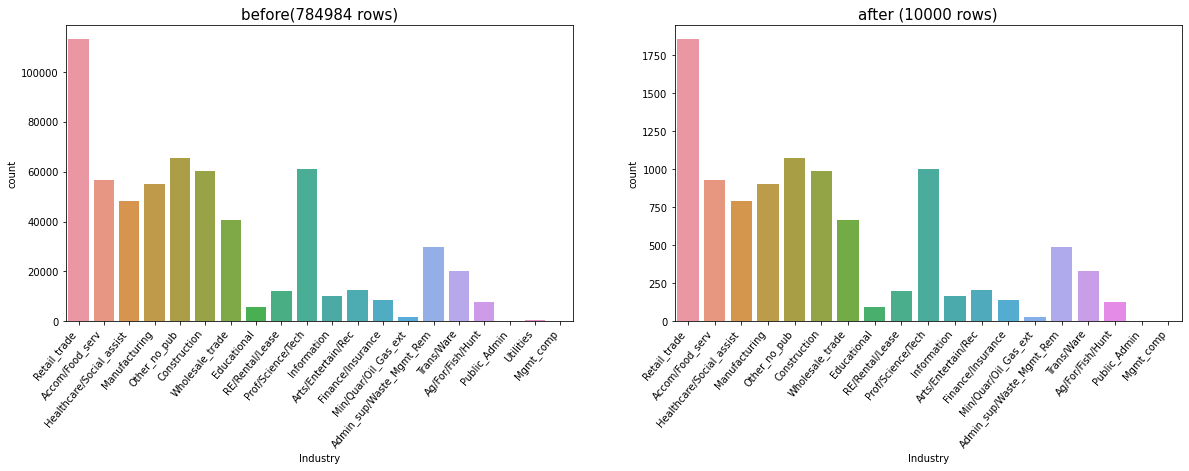

In [82]:
plt.figure(figsize=(20, 12))

plt.subplot(221)
plt.title('before(784984 rows)', size=15)
sns.countplot(df['Industry'])
plt.xticks(rotation=50, horizontalalignment='right', fontsize=10)

plt.subplot(222)
plt.title('after (10000 rows)', size=15)
order = ['Retail_trade', 'Accom/Food_serv', 'Healthcare/Social_assist', 'Manufacturing', 'Other_no_pub', 'Construction', 'Wholesale_trade', 'Educational', 'RE/Rental/Lease', 'Prof/Science/Tech', 'Information','Arts/Entertain/Rec', 'Finance/Insurance', 'Min/Quar/Oil_Gas_ext', 'Admin_sup/Waste_Mgmt_Rem', 'Trans/Ware', 'Ag/For/Fish/Hunt','Public_Admin','Mgmt_comp']
sns.countplot(df_strat['Industry'], order=order);
plt.xticks(rotation=50, horizontalalignment='right', fontsize=10)

Describe data yang barisnya 784984.

In [83]:
df.describe()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,ApprovalYear,ApprovalMonth,ApprovalDay,DisbursementYear,DisbursementMonth,DisbursementDay,Default,IsFranchise,SBA_AppvPct,DisbursementFY,GreatRecession,RealEstate
count,7.849840e+05,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784929.000000,784984.000000,784984.000000,784984.0
mean,4.740156e+09,344889.746368,14778.884838,24.032248,17397.381632,2790.368725,28.366228,400392.575224,0.714258,0.178753,0.000980,0.289938,0.000990,0.001148,2640.142887,0.250282,0.137260,0.031428,0.000004,0.819363,0.009081,0.229881,0.176345,2000.912285,6.487908,16.179846,2001.190178,6.360716,27.985812,0.180637,0.054427,0.706262,2001.190178,0.144609,0.0
std,2.553068e+09,198571.828997,8760.377152,14.996248,10130.993875,1844.175727,15.613992,263082.952160,0.131706,0.126131,0.007342,0.453734,0.028321,0.026259,12547.774002,0.433175,0.344122,0.032801,0.001664,0.384717,0.032494,0.232084,0.193999,5.932188,3.354451,8.757571,5.857905,3.435133,7.064696,0.384717,0.226858,0.178185,5.857905,0.351707,0.0
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1972.000000,1.000000,1.000000,1972.000000,1.000000,1.000000,0.000000,0.000000,0.040808,1972.000000,0.000000,0.0
25%,2.526963e+09,172401.750000,6925.000000,9.000000,8161.000000,959.000000,16.000000,235310.000000,0.622222,0.105448,0.000200,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.008819,0.000000,1.000000,0.000000,0.055619,0.036433,1996.000000,4.000000,9.000000,1997.000000,4.000000,30.000000,0.000000,0.000000,0.499904,1997.000000,0.000000,0.0
50%,4.304888e+09,346252.500000,14805.000000,24.000000,18319.000000,2936.000000,30.000000,446120.000000,0.755556,0.147627,0.000400,0.000000,0.000000,0.000105,1.000000,0.000000,0.000000,0.020433,0.000000,1.000000,0.000000,0.141926,0.094919,2002.000000,6.000000,16.000000,2003.000000,7.000000,31.000000,0.000000,0.000000,0.750987,2003.000000,0.000000,0.0
75%,6.883696e+09,516820.250000,22506.000000,37.000000,27157.000000,4426.000000,43.000000,561730.000000,0.822222,0.210896,0.000900,1.000000,0.000114,0.000421,1.000000,1.000000,0.000000,0.043398,0.000000,1.000000,0.000000,0.314538,0.243528,2006.000000,9.000000,24.000000,2006.000000,10.000000,31.000000,0.000000,0.000000,0.853202,2006.000000,0.000000,0.0
max,9.996003e+09,687835.000000,30817.000000,50.000000,32583.000000,5666.000000,55.000000,928120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2070.000000,12.000000,31.000000,2071.000000,12.000000,31.000000,1.000000,1.000000,1.131362,2071.000000,1.000000,0.0


Describe data yang barisnya 10000.

In [84]:
df_strat.describe()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,ApprovalYear,ApprovalMonth,ApprovalDay,DisbursementYear,DisbursementMonth,DisbursementDay,Default,IsFranchise,SBA_AppvPct,DisbursementFY,GreatRecession,RealEstate
count,9.983000e+03,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.0,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9981.000000,9983.000000,9983.000000,9983.0
mean,4.592268e+09,343365.593709,14785.608234,23.737754,17319.654513,2697.866373,28.394170,515105.618652,0.754687,0.165559,0.000868,0.287990,0.000196,0.000455,2260.969448,0.312131,0.107583,0.029689,0.0,0.793148,0.010063,0.208679,0.155044,2002.726034,6.512672,16.334769,2002.970650,6.398177,28.077331,0.206852,0.044476,0.676310,2002.970650,0.188520,0.0
std,2.468003e+09,198622.828419,8681.823911,15.083277,10174.041887,1851.263691,15.627713,173003.771047,0.110582,0.117812,0.010322,0.452849,0.001229,0.001234,11804.860509,0.463386,0.309868,0.032891,0.0,0.405068,0.033357,0.219736,0.181149,4.971706,3.349509,8.753241,4.912502,3.422091,7.143941,0.405068,0.206160,0.179331,4.912502,0.391147,0.0
min,1.001124e+09,1.000000,76.000000,0.000000,0.000000,3.000000,0.000000,111150.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1987.000000,1.000000,1.000000,1987.000000,1.000000,1.000000,0.000000,0.000000,0.183911,1987.000000,0.000000,0.0
25%,2.483600e+09,172536.000000,7375.500000,9.000000,7635.500000,914.000000,16.000000,423840.000000,0.711111,0.105448,0.000200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007701,0.0,1.000000,0.000000,0.046509,0.027804,2000.000000,4.000000,9.000000,2001.000000,4.000000,30.000000,0.000000,0.000000,0.499904,2001.000000,0.000000,0.0
50%,4.148764e+09,344931.000000,14757.000000,23.000000,18282.000000,2731.000000,30.000000,512240.000000,0.777778,0.147627,0.000400,0.000000,0.000000,0.000105,1.000000,0.000000,0.000000,0.018120,0.0,1.000000,0.000000,0.113157,0.079291,2004.000000,6.000000,16.000000,2004.000000,6.000000,31.000000,0.000000,0.000000,0.750413,2004.000000,0.000000,0.0
75%,6.556124e+09,514584.500000,22405.500000,37.000000,27302.500000,4282.000000,43.000000,621340.000000,0.822222,0.168717,0.000800,1.000000,0.000114,0.000526,1.000000,1.000000,0.000000,0.039331,0.0,1.000000,0.000000,0.285769,0.220518,2006.000000,9.000000,24.000000,2006.000000,9.000000,31.000000,0.000000,0.000000,0.852201,2006.000000,0.000000,0.0
max,9.994463e+09,687816.000000,30795.000000,50.000000,32583.000000,5666.000000,55.000000,814110.000000,1.000000,0.629174,1.000000,1.000000,0.090909,0.055053,91283.000000,1.000000,1.000000,0.395253,0.0,1.000000,0.471811,0.999233,0.998082,2014.000000,12.000000,31.000000,2014.000000,12.000000,31.000000,1.000000,1.000000,1.035516,2014.000000,1.000000,0.0


In [85]:
df.describe(include=object)

,Industry
count,610372
unique,20
top,Retail_trade
freq,113390


In [86]:
df_strat.describe(include=object)

,Industry
count,9983
unique,17
top,Retail_trade
freq,1858


Kita hanya menggunakan 17 industri karena 3 industri lain jumlahnya cukup kecil karena tidak memengaruhi performance data.

In [87]:
df_strat = df_strat.drop(columns=['RetainedJob', 'GrAppv', 'CreateJob','Name','BankState'])

In [88]:
df_strat.dropna(subset=["Industry"])

,LoanNr_ChkDgt,City,State,Zip,Bank,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,FranchiseCode,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,SBA_Appv,ApprovalYear,ApprovalMonth,ApprovalDay,DisbursementYear,DisbursementMonth,DisbursementDay,Default,IsFranchise,Industry,SBA_AppvPct,DisbursementFY,GreatRecession,RealEstate
0,3054365004,7816,14,20022,3158,623110,2008-04-18,0.866667,0.054482,0.0004,1.0,0,0,0,2009-06-30,0.011601,0.0,0,0.042427,0.047651,2008,4,18,2009,6,30,1,0.0,Healthcare/Social_assist,0.499904,2009,1,0
1,2678335010,15448,43,26392,900,621512,2007-09-04,0.844444,0.193322,0.0002,1.0,0,0,0,2007-09-30,0.008943,0.0,1,0.034455,0.064238,2007,9,4,2007,9,30,0,0.0,Healthcare/Social_assist,0.858810,2007,1,0
2,4053635005,23775,4,29455,3158,621210,2010-04-29,0.911111,0.147627,0.0010,0.0,0,0,0,2010-05-01,0.050751,0.0,1,0.000000,0.198754,2010,4,29,2010,5,1,0,0.0,Healthcare/Social_assist,0.499904,2010,0,0
3,3842885008,12138,26,19788,5410,624410,2010-01-06,0.911111,0.042179,0.0006,0.0,0,0,0,2010-01-06,0.000050,0.0,1,0.000000,0.003068,2010,1,6,2010,1,6,0,0.0,Healthcare/Social_assist,0.499904,2010,0,0
4,4637644005,24996,35,14265,2845,624410,2001-07-06,0.711111,0.421793,0.0011,0.0,1,0,0,2001-10-17,0.040492,0.0,1,0.000000,0.319271,2001,7,6,2001,10,17,0,0.0,Healthcare/Social_assist,1.002820,2001,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,4358444001,20051,5,27038,215,213113,2001-03-07,0.711111,0.147627,0.0002,0.0,1,0,1,2001-04-30,0.022606,0.0,1,0.000000,0.153883,2001,3,7,2001,4,30,0,0.0,Min/Quar/Oil_Gas_ext,0.853560,2001,0,0
9979,3027735002,14041,28,19488,2517,212321,2008-04-01,0.866667,0.115993,0.0002,1.0,0,0,0,2008-04-30,0.013638,0.0,1,0.000000,0.095043,2008,4,1,2008,4,30,0,0.0,Min/Quar/Oil_Gas_ext,0.855881,2008,1,0
9980,3690206010,1565,23,19012,5288,212321,2009-02-26,0.888889,0.008787,0.0005,0.0,1,1,0,2009-07-31,0.023848,0.0,1,0.000000,0.094919,2009,2,26,2009,7,31,0,0.0,Min/Quar/Oil_Gas_ext,0.499904,2009,1,0
9981,5193864004,4948,43,25458,5266,213112,2002-02-04,0.733333,0.210896,0.0003,1.0,1,0,0,2002-03-31,0.114867,0.0,1,0.000000,0.669799,2002,2,4,2002,3,31,0,0.0,Min/Quar/Oil_Gas_ext,0.750393,2002,0,0


In [89]:
df_strat['Industry'] = label_encoder.fit_transform(df_strat['Industry'])

In [90]:
df_strat = df_strat.dropna(subset=["SBA_AppvPct"], axis=0)

In [91]:
df_strat.isna().sum()

LoanNr_ChkDgt        0
City                 0
State                0
Zip                  0
Bank                 0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
FranchiseCode        0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
SBA_Appv             0
ApprovalYear         0
ApprovalMonth        0
ApprovalDay          0
DisbursementYear     0
DisbursementMonth    0
DisbursementDay      0
Default              0
IsFranchise          0
Industry             0
SBA_AppvPct          0
DisbursementFY       0
GreatRecession       0
RealEstate           0
dtype: int64

Sesuai dengan hasil correlation matrix dan VIF, `Name, Bank State, RetainedJob, GrAppv, CreatedJob` tidak diikutkan kedalam model.

In [92]:
X = df_strat.drop(columns=['LoanNr_ChkDgt','MIS_Status', 'Default','ApprovalDate','DisbursementDate'])
y = df_strat['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7984, 28), (1997, 28), (7984,), (1997,))

# 3.2 Modeling

Kami menggunakan metrics **recall** dan **roc_auc** dalam evaluasi untuk meminimalkan False Negative. Kita menggunakan statement `ChgOff` untuk positif dan `P I F` untuk negatif.

Model memprediksi kalau customer itu `PIF` tapi aslinya `ChgOff`

Kemudian, untuk modeling nanti kami akan gunakan beberapa model yang akan bandingkan, yaitu:


*   RandomForest
*   DecisionTree
*   Logistic Regression








## 3.2.1 RandomForest Classifier

Metrics recall.

In [93]:
rf = RandomForestClassifier(random_state=42, class_weight="balanced")
rf_cv_results_recall = cross_validate(rf, X_train, y_train, cv=10,scoring='recall', return_train_score=True)
rf_cv_results_recall

{'fit_time': array([0.6530211 , 0.63061428, 0.65524435, 0.64380574, 0.66666317,
        0.66747713, 0.65510035, 0.67892456, 0.65298462, 1.1175108 ]),
 'score_time': array([0.01825833, 0.02239919, 0.01627994, 0.01739955, 0.01731205,
        0.02274823, 0.01767373, 0.01785874, 0.01705647, 0.01780105]),
 'test_score': array([0.99393939, 1.        , 0.9939759 , 1.        , 1.        ,
        1.        , 1.        , 0.98787879, 0.98787879, 1.        ]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [94]:
print("mean test score  : ",rf_cv_results_recall['test_score'].mean())
print("std test score   : ",rf_cv_results_recall['test_score'].std())
print("mean train score :",rf_cv_results_recall['train_score'].mean())

mean test score  :  0.9963672873311428
std test score   :  0.004846671397095494
mean train score : 1.0


Metrics roc_auc.

In [95]:
rf = RandomForestClassifier(random_state=42, class_weight="balanced")
rf_cv_results_roc_auc = cross_validate(rf, X_train, y_train, cv=10,scoring='roc_auc', return_train_score=True)
rf_cv_results_roc_auc

{'fit_time': array([1.09723043, 1.11746955, 0.69200826, 0.66626239, 0.65166068,
        0.66290951, 0.66303229, 0.68814135, 0.64625478, 0.68329144]),
 'score_time': array([0.01885605, 0.01832318, 0.01709151, 0.02078438, 0.01738739,
        0.01749825, 0.01820588, 0.01794124, 0.01763105, 0.01770997]),
 'test_score': array([0.99610458, 0.99871427, 0.99735435, 0.99756847, 0.99877447,
        0.99471971, 0.99934894, 0.99582555, 0.99560534, 0.99963617]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [96]:
print("mean test score  : ",rf_cv_results_roc_auc['test_score'].mean())
print("std test score   : ",rf_cv_results_roc_auc['test_score'].std()) 
print("mean train score :",rf_cv_results_roc_auc['train_score'].mean())

mean test score  :  0.9973651862176377
std test score   :  0.0016430283535639656
mean train score : 1.0


## 3.2.2 DecisionTree Classifier

In [97]:
dec_tree = DecisionTreeClassifier(random_state=42,class_weight='balanced')
dec_tree_cv_results_recall= cross_validate(dec_tree, X_train, y_train, cv = 10, scoring = 'recall', return_train_score= True)
dec_tree_cv_results_recall

{'fit_time': array([0.03339481, 0.0267787 , 0.02903509, 0.02880931, 0.02935958,
        0.02928042, 0.03056788, 0.03212976, 0.02825642, 0.03173208]),
 'score_time': array([0.00278258, 0.00255752, 0.0030117 , 0.00233197, 0.00233579,
        0.00237942, 0.00349903, 0.00237012, 0.00231981, 0.00270867]),
 'test_score': array([0.95757576, 0.94545455, 0.95783133, 0.96385542, 0.93939394,
        0.96363636, 0.98787879, 0.96363636, 0.95151515, 0.94545455]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [98]:
print("mean test score  : ",dec_tree_cv_results_recall['test_score'].mean())
print("std test score   : ",dec_tree_cv_results_recall['test_score'].std()) 
print("mean train score :",dec_tree_cv_results_recall['train_score'].mean())

mean test score  :  0.9576232201533406
std test score   :  0.013009110389376754
mean train score : 1.0


In [99]:
dec_tree = DecisionTreeClassifier(random_state=42,class_weight='balanced')
dec_tree_cv_results_roc_auc = cross_validate(dec_tree, X_train, y_train, cv = 10, scoring = 'roc_auc', return_train_score= True)
dec_tree_cv_results_roc_auc

{'fit_time': array([0.03192091, 0.02842617, 0.02910209, 0.02908325, 0.02976251,
        0.02976155, 0.02909255, 0.03059459, 0.03118515, 0.02955008]),
 'score_time': array([0.00264406, 0.00269341, 0.00341129, 0.00321269, 0.00271773,
        0.00266886, 0.00267267, 0.00266671, 0.00268388, 0.00352621]),
 'test_score': array([0.97484466, 0.9695727 , 0.97496622, 0.97797826, 0.96890708,
        0.97628896, 0.99235962, 0.97707885, 0.97259802, 0.97114749]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [100]:
print("mean test score  : ",dec_tree_cv_results_roc_auc['test_score'].mean())
print("std test score   : ",dec_tree_cv_results_roc_auc['test_score'].std())
print("mean train score :",dec_tree_cv_results_roc_auc['train_score'].mean())

mean test score  :  0.9755741847673176
std test score   :  0.006325569370956146
mean train score : 1.0


## 3.2.3 Logistic Regression

In [101]:
lr = LogisticRegression() 
lr_cv_results_recall = cross_validate (lr, X_train, y_train, cv = 10, scoring = 'recall', return_train_score= True)
lr_cv_results_recall

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'fit_time': array([0.08323908, 0.06958389, 0.10839176, 0.08311319, 0.08852649,
        0.13381386, 0.0855794 , 0.07142377, 0.077595  , 0.09205008]),
 'score_time': array([0.0030818 , 0.00318265, 0.00318503, 0.00326157, 0.00423288,
        0.00311112, 0.00437617, 0.00316572, 0.00310206, 0.00310922]),
 'test_score': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'train_score': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

In [102]:
print("mean test score  : ",lr_cv_results_recall['test_score'].mean()) 
print("std test score   : ",lr_cv_results_recall['test_score'].std()) 
print("mean train score :",lr_cv_results_recall['train_score'].mean()) 

mean test score  :  0.0
std test score   :  0.0
mean train score : 0.0


In [103]:
lr = LogisticRegression() 
lr_cv_results_roc_auc = cross_validate (lr, X_train, y_train, cv = 10, scoring = 'roc_auc', return_train_score= True)
lr_cv_results_roc_auc

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'fit_time': array([0.09651685, 0.07182193, 0.09758425, 0.08166528, 0.0989151 ,
        0.12793684, 0.07779551, 0.08642459, 0.08270311, 0.07596803]),
 'score_time': array([0.00323248, 0.00320816, 0.00324965, 0.00320816, 0.0033803 ,
        0.00346589, 0.0032444 , 0.00327969, 0.00332928, 0.00320339]),
 'test_score': array([0.56679094, 0.56544307, 0.60065856, 0.5621348 , 0.54301307,
        0.58421179, 0.60181914, 0.58960218, 0.6140361 , 0.58871176]),
 'train_score': array([0.58319712, 0.58366744, 0.57863768, 0.58445556, 0.58586312,
        0.60614983, 0.57987285, 0.58141632, 0.57822188, 0.58071963])}

In [104]:
print("mean test score  : ",lr_cv_results_roc_auc['test_score'].mean()) 
print("std test score   : ", lr_cv_results_roc_auc['test_score'].std()) 
print("mean train score :",lr_cv_results_roc_auc['train_score'].mean()) 

mean test score  :  0.5816421400691671
std test score   :  0.020721385837612242
mean train score : 0.5842201412175698


## 3.2.4 Perbandingan Model

In [105]:
df_model= pd.DataFrame({
        'Model': ['RandomForest','DecisionTree','LogisticRegression'],
        'Training_Score_Recall': [rf_cv_results_recall['train_score'].mean(), dec_tree_cv_results_recall['train_score'].mean(), lr_cv_results_recall['train_score'].mean()],
        'CV_Recall_(mean)': [rf_cv_results_recall['test_score'].mean(), dec_tree_cv_results_recall['test_score'].mean(), lr_cv_results_recall['test_score'].mean()],
        'CV_Recall_(std)' : [rf_cv_results_recall['test_score'].std(),dec_tree_cv_results_recall['test_score'].std(), lr_cv_results_recall['test_score'].std()],
        'Training_Score_roc_auc': [rf_cv_results_roc_auc['train_score'].mean(), dec_tree_cv_results_roc_auc['train_score'].mean(), lr_cv_results_roc_auc['train_score'].mean()],
        'CV roc_auc_(mean)': [rf_cv_results_roc_auc['test_score'].mean(), dec_tree_cv_results_roc_auc['test_score'].mean(), lr_cv_results_roc_auc['test_score'].mean()],
        'CV roc_auc_(std)' : [rf_cv_results_roc_auc['test_score'].std(), dec_tree_cv_results_roc_auc['test_score'].std(), lr_cv_results_roc_auc['test_score'].std()]
    })
df_model

,Model,Training_Score_Recall,CV_Recall_(mean),CV_Recall_(std),Training_Score_roc_auc,CV roc_auc_(mean),CV roc_auc_(std)
0,RandomForest,1.0,0.996367,0.004847,1.00000,0.997365,0.001643
1,DecisionTree,1.0,0.957623,0.013009,1.00000,0.975574,0.006326
2,LogisticRegression,0.0,0.000000,0.000000,0.58422,0.581642,0.020721


Simpan model nya di dalam file pickle dan load model.

In [106]:
joblib.dump(df_model, 'model.pkl')
model_from_joblib = joblib.load('model.pkl')

Memilih RandomForest karena good learner. Mean tinggi, Std nya rendah, dan perbedaan training score & mean tidak begitu jauh.

DecisionTree overfit.

## 3.2.5 Hyperparameter Tuning (RandomizedSearch)



In [108]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

pipeline = Pipeline([
        ('algo', rf)
    ])

param = {'algo__n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
 'algo__max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
 'algo__max_features': ['auto', 'sqrt', 'log2'],
 'algo__min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)]} # default 1

model = RandomizedSearchCV(estimator=pipeline,
                     param_distributions=param, 
                     cv=5, 
                     scoring='recall', 
                     n_jobs=-1, 
                     verbose=1,
                     n_iter=50)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'algo__n_estimators': 1800, 'algo__min_samples_leaf': 10, 'algo__max_features': 'sqrt', 'algo__max_depth': 40}
0.9993946731234867 0.9981854801794379


Save Model

In [109]:
os.makedirs('file_model', exist_ok=True)

In [110]:
os.makedirs('/content/drive/MyDrive/FINAL PROJECT RAKAMIN/model_file',exist_ok=True)

In [111]:
estimator = RandomForestClassifier(random_state=42,max_depth=110, max_features='sqrt', min_samples_leaf=1, n_estimators=500, class_weight='balanced')
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('/content/drive/MyDrive/FINAL PROJECT RAKAMIN/model_file/Final_Model_.sav', 'wb'))

Load Model

In [112]:
loaded_model = pickle.load(open('/content/drive/MyDrive/FINAL PROJECT RAKAMIN/model_file/Final_Model_.sav', 'rb'))

# 3.3 Predict On Test Set

In [113]:
y_pred = loaded_model.predict(X_test)

In [114]:
print('Recall:',recall_score(y_test, y_pred))

Recall: 0.9951573849878934


In [115]:
print('roc_auc_score :', roc_auc_score(y_test, y_pred))

roc_auc_score : 0.9941064702717245


# 3.4 Feature Importance

In [116]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

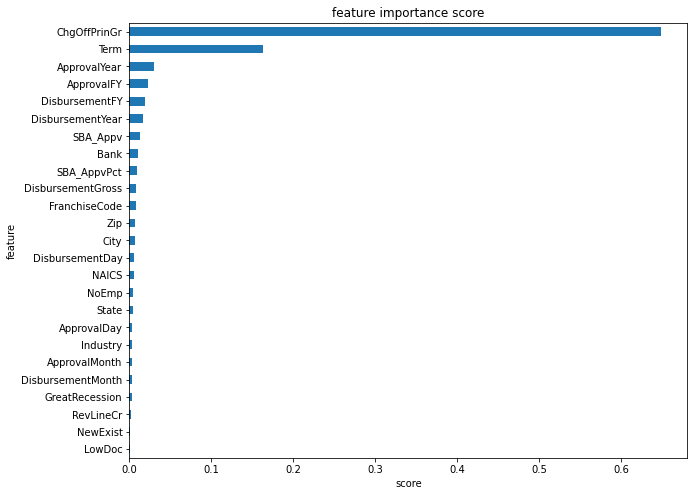

In [117]:
rf.fit(X_train,y_train)
show_feature_importance(rf)

# 3.5 Pengujian Feature Importance

## 3.5.1 Modeling

Dari kelima fitur teratas yang dihasilkan dari grafik di atas, kita mencoba melakukan modeling lagi. Jika score yang dihasilkan tidak terlalu berbeda, maka fitur yang lain tidak berpengaruh besar terhadap target. 

Sesuai pengujian **feature importance** di atas, lima feature teratas adalah: 


*   ChgOffPrinGr
*   Term
*   ApprovalYear
*   ApprovalFY
*   DisbursementFY
*   DisbursementYear
*   DisbursementGross

Karena feature ApprovalYear sama dengan ApprovalFY, kemudian DisbursementYear sama dengan DisbursementFY, maka kita cukup memilih salah satu saja sehingga menjadi:

*   ChgOffPrinGr
*   Term
*   ApprovalFY
*   DisbursementFY
*   DisbursementGross

Setelah mendapatkan 5 feature teratas, kita mencoba lagi proses cross validation dan hyperparameter tuning.

Sesuai dengan hasil correlation matrix dan VIF, `Name, Bank State, RetainedJob, GrAppv, CreatedJob` tidak diikutkan kedalam model.

In [118]:
X = df_strat.drop(columns=['LoanNr_ChkDgt','MIS_Status', 'Default','ApprovalDate','DisbursementDate','ApprovalYear','DisbursementYear','SBA_Appv','Zip','State','City','NAICS','Bank','NoEmp','ApprovalDay','GreatRecession','Industry','DisbursementMonth','ApprovalMonth','DisbursementDay','RevLineCr','NewExist'])
y = df_strat['Default']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((7984, 11), (1997, 11), (7984,), (1997,))

Dataset dengan 5 feature utama diuji lagi dengan modeling RandomForest

Metrics recall.

In [119]:
rf = RandomForestClassifier(random_state=42, class_weight="balanced")
rf_cv_results_recall = cross_validate(rf, X_train2, y_train2, cv=10,scoring='recall', return_train_score=True)
rf_cv_results_recall

{'fit_time': array([0.36526203, 0.37754226, 0.3524878 , 0.35539842, 0.35952234,
        0.36290979, 0.36187077, 0.36631703, 0.35802722, 0.35346317]),
 'score_time': array([0.01750779, 0.01603246, 0.0170517 , 0.01952338, 0.01756978,
        0.01718402, 0.0174067 , 0.01702619, 0.01708508, 0.01626134]),
 'test_score': array([1.        , 1.        , 0.9939759 , 1.        , 1.        ,
        1.        , 1.        , 0.98787879, 0.98787879, 1.        ]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [120]:
print("mean test score  : ",rf_cv_results_recall['test_score'].mean())
print("std test score   :", rf_cv_results_recall['test_score'].std())
print("mean train score :",rf_cv_results_recall['train_score'].mean())

mean test score  :  0.9969733479372034
std test score   : 0.004883964340009338
mean train score : 1.0


Kesimpulan: Karena hasilnya tidak berbeda jauh dengan modeling menggunakan 28 feature di awal, maka dapat disimpulkan bahwa pada proses selanjutnya dapat berjalan dengan 5 feature teratas saja.

## 3.5.2 Hyperparameter Tuning

In [122]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

pipeline = Pipeline([
        ('algo', rf)
    ])

param = {'algo__n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
 'algo__max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
 'algo__max_features': ['auto', 'sqrt', 'log2'],
 'algo__min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)]} # default 1

model = RandomizedSearchCV(estimator=pipeline,
                     param_distributions=param, 
                     cv=10, 
                     scoring='recall', 
                     n_jobs=-1, 
                     verbose=1,
                     n_iter=100)
model.fit(X_train2, y_train2)

print(model.best_params_)
print(model.score(X_train2, y_train2), model.best_score_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'algo__n_estimators': 2000, 'algo__min_samples_leaf': 10, 'algo__max_features': 'auto', 'algo__max_depth': 90}
0.9993946731234867 0.9987878787878788


# 3.6 Model Evaluation

## 3.6.1 Confusion Matrix Data Training and Data Testing

In [123]:
rf =  RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train2, y_train2)

y_pred = rf.predict(X_train2)
y_pred_train = rf.predict(X_train2)
cm = confusion_matrix(y_train2, y_pred)
print("Matrix Data Training:")
print(cm)
print("")

rf =  RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train2, y_train2)

y_pred = rf.predict(X_test2)
y_pred_train = rf.predict(X_train2)
cm = confusion_matrix(y_test2, y_pred)
print("Matrix Data Testing:")
print(cm)

Matrix Data Training:
[[6332    0]
 [   0 1652]]

Matrix Data Testing:
[[1572   12]
 [   3  410]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


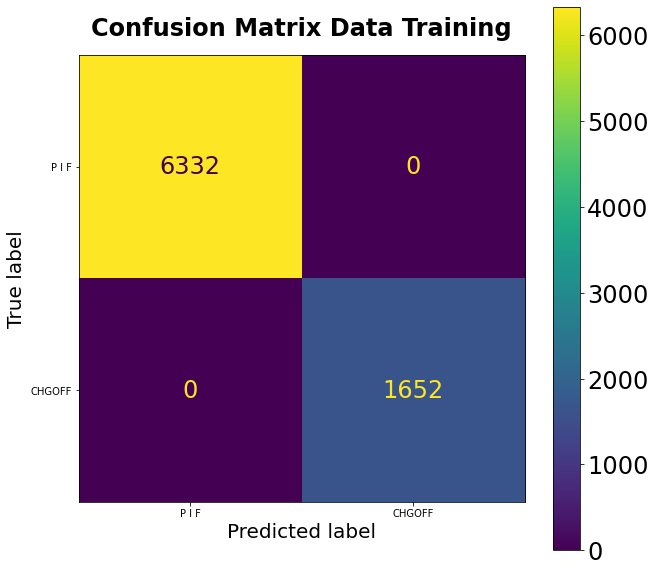

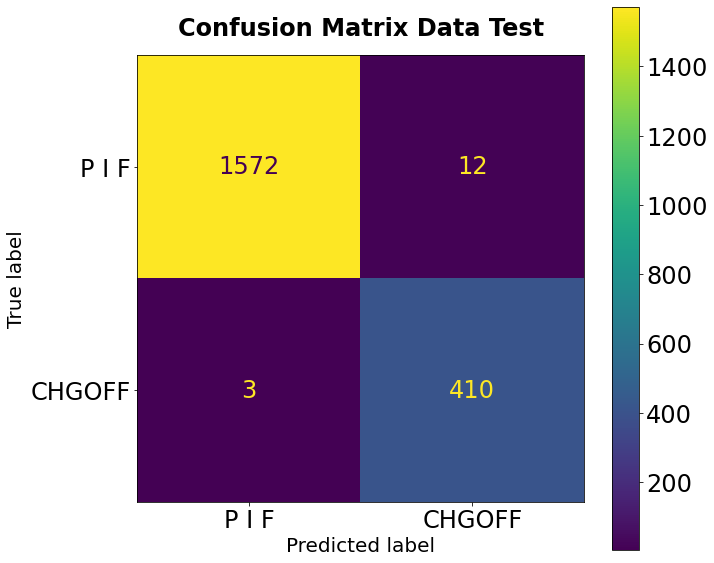

In [124]:
y_pred = rf.predict(X_train2)
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Confusion Matrix Data Training', fontsize = 24, fontweight = 'bold', pad = 20, color='black')
plt.rcParams['font.size'] = 24
plt.xlabel('Predicted Label', fontsize = 20)
plt.ylabel('True Label', fontsize = 20)
plot_confusion_matrix(rf, X_train2, y_train2,display_labels=['P I F','CHGOFF'], ax=ax)


y_pred = rf.predict(X_test2)
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Confusion Matrix Data Test', fontsize = 24, fontweight = 'bold', pad = 20, color='black')
plt.rcParams['font.size'] = 24
plt.xlabel('Predicted Label', fontsize = 20)
plt.ylabel('True Label', fontsize = 20)
plot_confusion_matrix(rf, X_test2, y_test2,display_labels=['P I F','CHGOFF'], ax=ax)


## 3.6.2 ROC AUC Curve

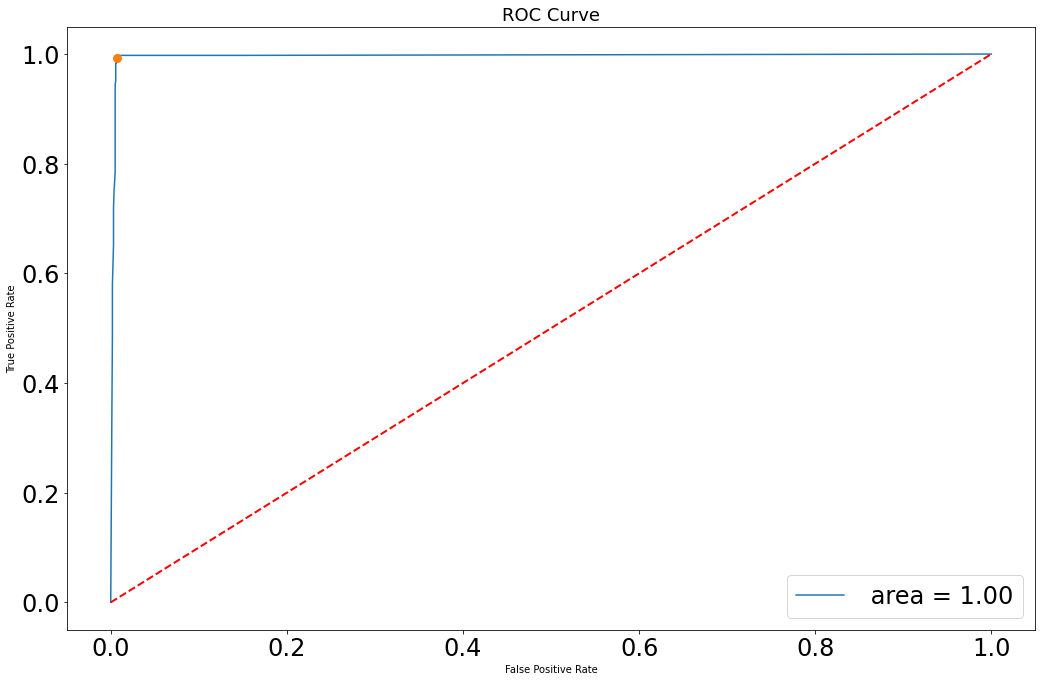

In [125]:
rcParams['figure.figsize'] = 15, 10

y_pred_prob = rf.predict_proba(X_test2)[:,1]
fig, ax = plt.subplots()
fpr, tpr, thresholds_roc = roc_curve(y_test2, y_pred_prob)
roc_auc = auc(fpr,tpr)
ax.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc))
ax.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax.set_xlabel("False Positive Rate", fontsize = 10)
ax.set_ylabel("True Positive Rate", fontsize = 10)
ax.set_title("ROC Curve", fontsize = 18)
ax.legend(loc = 'best')

close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

# Business Recommendations








New policy consequences (require predictive model)


**Action:**


* Predict the default loans based on the charge off status for the next year

* State the precautionary action in case there is a borrower who is predicted to paid in full even though they didn't




**Precautionary action:**
* Adding points about warranty (Real Estate or other assets) in new policy
* Adding penalty 2% per month for borrowers who do the late payment  in new policy 

**Area of Improvements:**
* To ensure the minimum number of default borrower, which aims to decrease the number of  charged off amount.

**Adjust Max Rate:**
* We adjust the Max Rate to the highest rate at it level. We make adjustment to cover the default loans.

**Adjust Maturity Period:**

* We adjust the Maturity Period with minimum period is 5 years and maximum periode is  25 years.  We make adjustment to reduce the Charge-off loans since Term and Charge-off have high correlation

**Rgeulation for Rental Industry:**
* We have special treatment for rental industry since the most default loans come from rental Industry. The rental industry need to have minimal margin 50% from the loan in the last 6 months. 


In [141]:
csv_before = ("https://raw.githubusercontent.com/AedentrisaYasmanda/rak-final-project/main/businnes_recom/business%20recom.xlsx%20-%20policy_bef.csv")
br_before=pd.read_csv(csv_before)
br_before.fillna(method='ffill',axis=0,inplace=True)
print('Policy Before:')
br_before

Policy Before:


,BEFORE,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Category of Prospective Borrower,Loan Amount,Maturity Period,Max rate (per year),Fees,SBA Percentage
1,-,"$25,000 or less",< 7 years,4.25%,2%,50%
2,-,"$25,000 or less",> 7 years,4.75%,2%,50%
3,-,"$25,000 to $50,000",< 7 years,3.25%,3%,50%
4,-,"$25,000 to $50,000",> 7 years,3.75%,3%,50%
5,-,"> $50,000",< 7 years,2.25%,4%,50%
6,-,"> $50,000",> 7 years,2.75%,4%,50%


In [142]:
csv_after = ("https://raw.githubusercontent.com/AedentrisaYasmanda/rak-final-project/main/businnes_recom/business%20recom.xlsx%20-%20policy_af.csv")
br_after=pd.read_csv(csv_after)
br_after.fillna(method='ffill',axis=0,inplace=True)
print('Policy After: ')
br_after

Policy After: 


,AFTER,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Category of Prospective Borrowers,Loan Amount,Maturity Period,Max rate (per year),Fees,SBA Percentage,Requirement (Real Estate) (NEW)
1,Approved,"$25,000 or less",< 5 years,4.75%,2%,50%,Guaranteed by Real Estate or other assets with...
2,Approved,"$25,000 to $50,000",< 15 years,3.75%,3%,50%,Guaranteed by Real Estate or other assets with...
3,Approved,"> $50,000",< 25 years,2.75%,4%,50%,Guaranteed by Real Estate or other assets with...
4,Rejected,"> $50,000",-,-,-,-,-


**Simulation**


In this case, we predict the default loans based loan in 2010. In 2010, there is 34.838 loans default. The model we made can predict 99% loan to be defaulted


Recall 99%
Predicted default : 99% of 34.838 = 34.490 
Margin error 1% = 348 

After implement the strategy, we can decrease the default borrower from 34.490 to 348

Before:


*  Predicted default : 34.838
BDA Loss: 869.681.200
 
 In this case, BDA have to bear the loss due to defaulted loans

After: 
*   Predicted default : 348
BDA Loss: 3.053.136
 
 In this case, BDA no longer have to bear the loss due to defaulted loans, otherwise BDA will get more revenue.



In [145]:
csv_bef = ("https://raw.githubusercontent.com/AedentrisaYasmanda/rak-final-project/main/businnes_recom/business%20recom.xlsx%20-%20before1.csv")
br_bef= pd.read_csv(csv_bef)
print('Simulation Before: ')
br_bef

Simulation Before: 


,Unnamed: 0,Still Default Borrowers (future),Disbursement Gross (Jumlah pinjaman yang cair),Total Disbursement,Collateral,Loan covered by SBA,IF TRUE DEFAULT,LOSS,Max Rate (Bunga tetap),Fees (Biaya pencairan pinjaman),Unnamed: 10,Unnamed: 11,Loss
0,99% success to reject,-,Median Disbursement Gross,Total Borrowers x Disbursement Gross,20%,75% x Total Disbursement Gross,NaN,NaN,"2,50%",4%,NaN,NaN,NaN
1,0,34.838,$106.228,$3.700.771.064,$740.154.213,$1.850.385.532,$2.590.539.745,$1.110.231.319,$92.519.277,$148.030.843,NaN,NaN,$869.681.200


In [144]:
csv_af=("https://raw.githubusercontent.com/AedentrisaYasmanda/rak-final-project/main/businnes_recom/business%20recom.xlsx%20-%20after1.csv")
br_af=pd.read_csv(csv_af)
print('Simulation After')
br_af

Simulation After


,Unnamed: 0,Still Default Borrowers (future),Disbursement Gross (Jumlah pinjaman yang cair),Total Disbursement,Collateral,Loan covered by SBA,IF TRUE DEFAULT,LOSS,Max Rate (Bunga tetap),Fees (Biaya pencairan pinjaman),Pinalty,Unnamed: 11,Loss
0,99% success to reject,-,Median Disbursement Gross,Total Borrowers x Disbursement Gross,35%,75% x Total Disbursement Gross,NaN,NaN,"2,75%",4%,2%,NaN,NaN
1,34.490,348,$106.228,$37.007.711,$12.952.699,$18.503.855,$31.456.554,$5.551.157,$1.017.712,$1.480.308,$740.154,NaN,$3.053.136


**Project Evaluation**


#Git

Berikut adalah repository github kami:


https://github.com/AedentrisaYasmanda/rak-final-project
